# EDA & ML - EV Adoption

## Data Preparation & Pre-processing

### Importing Libraries & Setting Up Data

In [41]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

In [42]:
address = '/workspaces/EVCFLO/datasets/T1_2023/IEA World/IEA-EV-data.csv'



df = pd.read_csv(address)

df.columns = ['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'value']
df.head(20)


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
5,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
6,Australia,Historical,EV stock,Cars,BEV,2012,stock,220.00000
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.00000
8,Australia,Historical,EV sales,Cars,BEV,2012,sales,170.00000
9,Australia,Historical,EV stock,Cars,PHEV,2012,stock,80.00000


In [43]:
df.describe(include='all')

,region,category,parameter,mode,powertrain,year,unit,value
count,7434,7434,7434,7434,7434,7434.000000,7434,7.434000e+03
unique,34,3,8,6,5,NaN,7,NaN
top,World,Historical,EV stock,Cars,EV,NaN,percent,NaN
freq,763,5686,1723,2684,2903,NaN,2155,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018.294996,NaN,2.510182e+05
std,NaN,NaN,NaN,NaN,NaN,4.910528,NaN,3.439397e+06
min,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,1.700000e-07
25%,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,6.900000e-01
50%,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,7.600000e+01
75%,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN,3.700000e+03


### Treating Duplicates & Missing Values

In [44]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7434 entries, 0 to 7433
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      7434 non-null   object 
 1   category    7434 non-null   object 
 2   parameter   7434 non-null   object 
 3   mode        7434 non-null   object 
 4   powertrain  7434 non-null   object 
 5   year        7434 non-null   int64  
 6   unit        7434 non-null   object 
 7   value       7434 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 464.8+ KB


In [45]:
# Count Missing Values
print('Missing Values by Attribute:')
print(df.isnull().sum())

# Filter Out Missing Values
df_no_nan = df.dropna(axis=0)
df_no_nan2 = df.dropna(axis=1)
print('\nMISSING VALUES')
print('Shape before filtering missing values: ' + str(df.shape))
print('Shape after filtering missing values by row: ' + str(df_no_nan.shape) + 'and column: ' + str(df_no_nan2.shape))

# Counting and dropping duplicated Data Values
counted = df.duplicated().sum()
print('\nDUPLICATED VALUES')
print('Number of duplicated data values: ' + str(counted))
print('Shape before dropping duplicates: ' + str(df.shape))
df2 = df.drop_duplicates()
print('Shape after dropping duplicates: ' + str(df2.shape))

Missing Values by Attribute:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

MISSING VALUES
Shape before filtering missing values: (7434, 8)
Shape after filtering missing values by row: (7434, 8)and column: (7434, 8)

DUPLICATED VALUES
Number of duplicated data values: 0
Shape before dropping duplicates: (7434, 8)
Shape after dropping duplicates: (7434, 8)


There are neither missing values or duplicated rows within the dataframe. Most of the data types are objects being parameters. The exceptions are value, and year indicating they are two important non-categorical columns. Same amount of data for each column. 


### Sorting, Selecting & Grouping Data 

In [46]:
# Select EV Charging Points specifically in Australia.
# ev_world = df[df['unit'] == 'charging points']
ev_world = df.drop(['category', 'mode', 'unit'], axis='columns')
ev_aus = ev_world[(ev_world['region'] == 'Australia') & (df['unit'] == 'charging points')]
ev_aus.head(10)

,region,parameter,powertrain,year,value
38,Australia,EV charging points,Publicly available fast,2017,40.0
39,Australia,EV charging points,Publicly available slow,2017,440.0
44,Australia,EV charging points,Publicly available fast,2018,61.0
45,Australia,EV charging points,Publicly available slow,2018,670.0
54,Australia,EV charging points,Publicly available fast,2019,250.0
55,Australia,EV charging points,Publicly available slow,2019,1700.0
60,Australia,EV charging points,Publicly available fast,2020,350.0
61,Australia,EV charging points,Publicly available slow,2020,2000.0
70,Australia,EV charging points,Publicly available fast,2021,350.0
73,Australia,EV charging points,Publicly available slow,2021,2000.0


## EDA - Australian EV Charging Stations

### Overview
Let's have a look at Australian data from an overview perspective. 

In [47]:
# Select All relevant Australian Data
ev_aus_all = ev_world[(ev_world['region'] == 'Australia')]

# Inspect the Head & Information 
print('\nEV Australian Data Information: \n') 
print(ev_aus_all.info())
print('\nHead of the Australian Data: \n' + str(ev_aus_all.head()) + '\n')


EV Australian Data Information: 

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      74 non-null     object 
 1   parameter   74 non-null     object 
 2   powertrain  74 non-null     object 
 3   year        74 non-null     int64  
 4   value       74 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.5+ KB
None

Head of the Australian Data: 
      region       parameter powertrain  year     value
0  Australia        EV sales        BEV  2011  49.00000
1  Australia        EV stock        BEV  2011  49.00000
2  Australia  EV stock share         EV  2011   0.00046
3  Australia  EV sales share         EV  2011   0.00650
4  Australia  EV sales share         EV  2012   0.03000



In [48]:
print('Describe the data: \n' + str(ev_aus_all.describe()))

Describe the data: 
              year         value
count    74.000000     74.000000
mean   2016.540541   2439.545691
std       3.093029   5272.672867
min    2011.000000      0.000460
25%    2014.000000      0.590000
50%    2017.000000    390.000000
75%    2019.000000   2000.000000
max    2021.000000  34000.000000


[Text(0.5, 1.0, 'Aus EV Data by Category')]

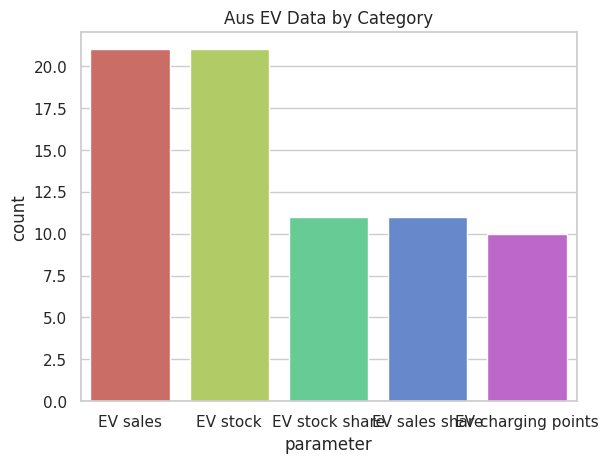

In [49]:
# Create a countplot to analyse data further
import seaborn as sb
sb.countplot(x='parameter', data=ev_aus_all, palette='hls').set(title='Aus EV Data by Category')

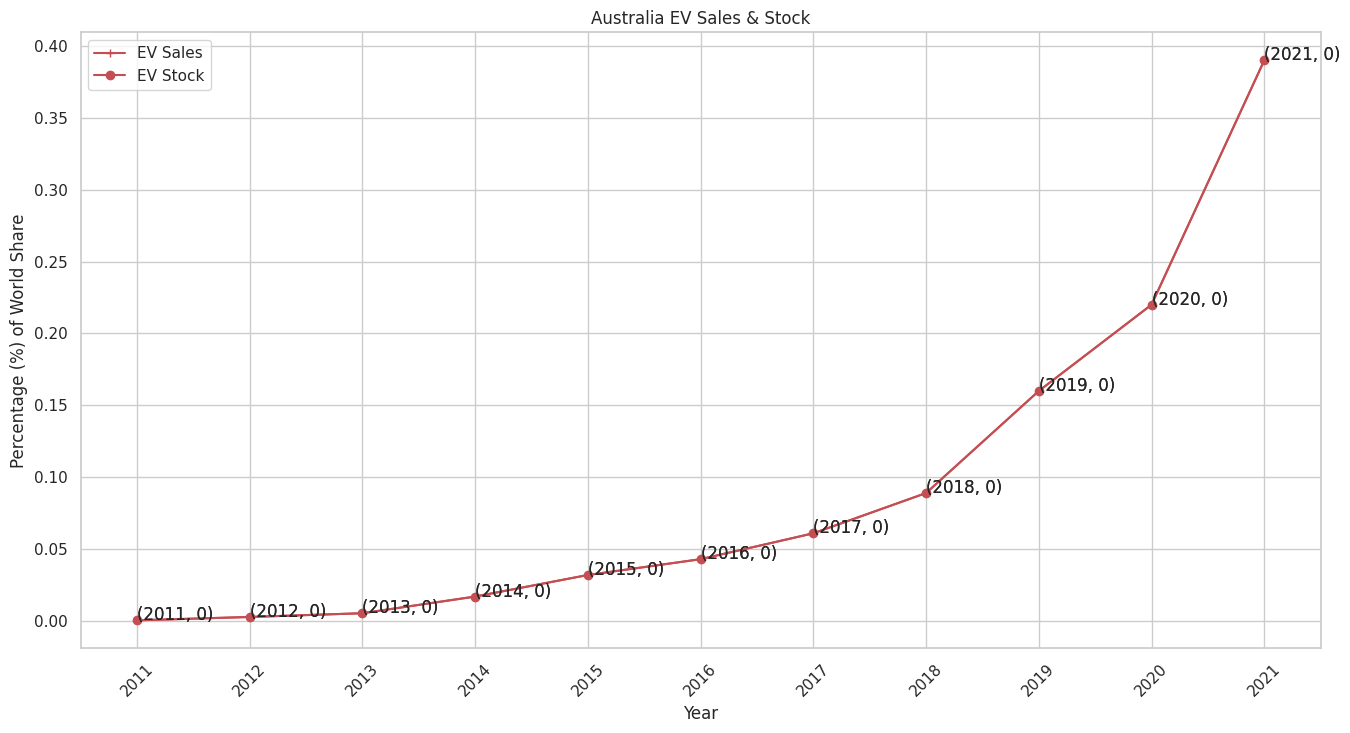

In [50]:
# Create a line plot showing Aus EV Sales & Stock World Percentage
# Select relevant figures
plt.figure(figsize=(16,8))
aus_sales_share = ev_aus_all[ev_aus_all['parameter'] == 'EV stock share']
aus_stock_share = ev_aus_all[ev_aus_all['parameter'] == 'EV stock share']
aus_stock_share.head(100)

# Create the plot & Set labels
plt.plot(aus_sales_share.year, aus_sales_share.value, linestyle='-', marker='+', color='r',  label = 'EV Sales')
plt.plot(aus_stock_share.year, aus_stock_share.value, linestyle='-', marker='o', color='r',  label = 'EV Stock')
plt.xlabel("Year")
plt.ylabel("Percentage (%) of World Share")
plt.legend()
plt.title('Australia EV Sales & Stock')
plt.xticks(aus_sales_share.year, aus_sales_share.year, rotation=45)

# Show the data points for comparison of growth 
for xy in zip(aus_sales_share.year, aus_sales_share.value):
   plt.annotate('(%.000f, %.000f)' % xy, xy=xy)

for xy in zip(aus_stock_share.year, aus_stock_share.value):
   plt.annotate('(%.00f, %.000f)' % xy, xy=xy)

From the above dataset, Australian EV Sales and Stock have been the same as a percentage of World share in the relative context. This is because they exhibit similar numbers. Both figures have consistently increased from 2011 to 2021 within Australia regardless of market conditions such as the pandemic. EV Stock and Sales has grown from nothing to around 0.4% of the World share of EV stock and sales. Bear in mind, Australia accounts for only approximately 0.32% of the World population. The figures show that Australia was initially under-represented in EV Sales and Stock. However, especially after the pandemic has ended it has become a leader in adoption in this regard as it accounts for a much higher percentage of global share (0.4%) than its population (0.32%). 

[Text(0.5, 1.0, 'Aus EV Stock, Sales & Charging Points by Year')]

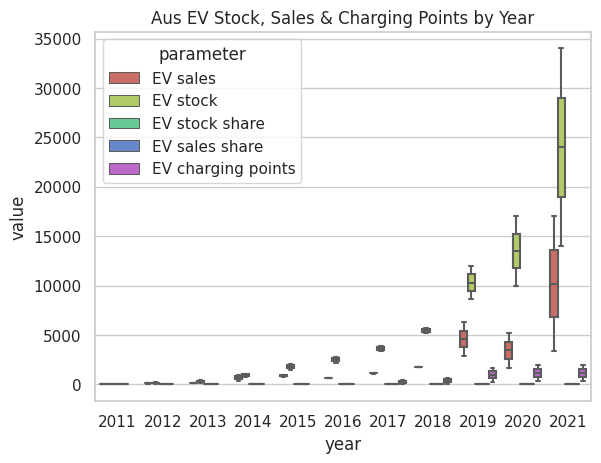

In [51]:
# Create a boxplot for the distribution
ev_aus_all2 = ev_aus_all.drop(ev_aus_all[ev_aus_all.parameter == "EV sales share"].index, axis=0)
ev_aus_all2 = ev_aus_all2.drop(ev_aus_all[ev_aus_all.parameter == "EV stock share"].index, axis=0)
sb.boxplot(x='year', y = 'value', data=ev_aus_all, palette = 'hls', hue='parameter').set(title='Aus EV Stock, Sales & Charging Points by Year')

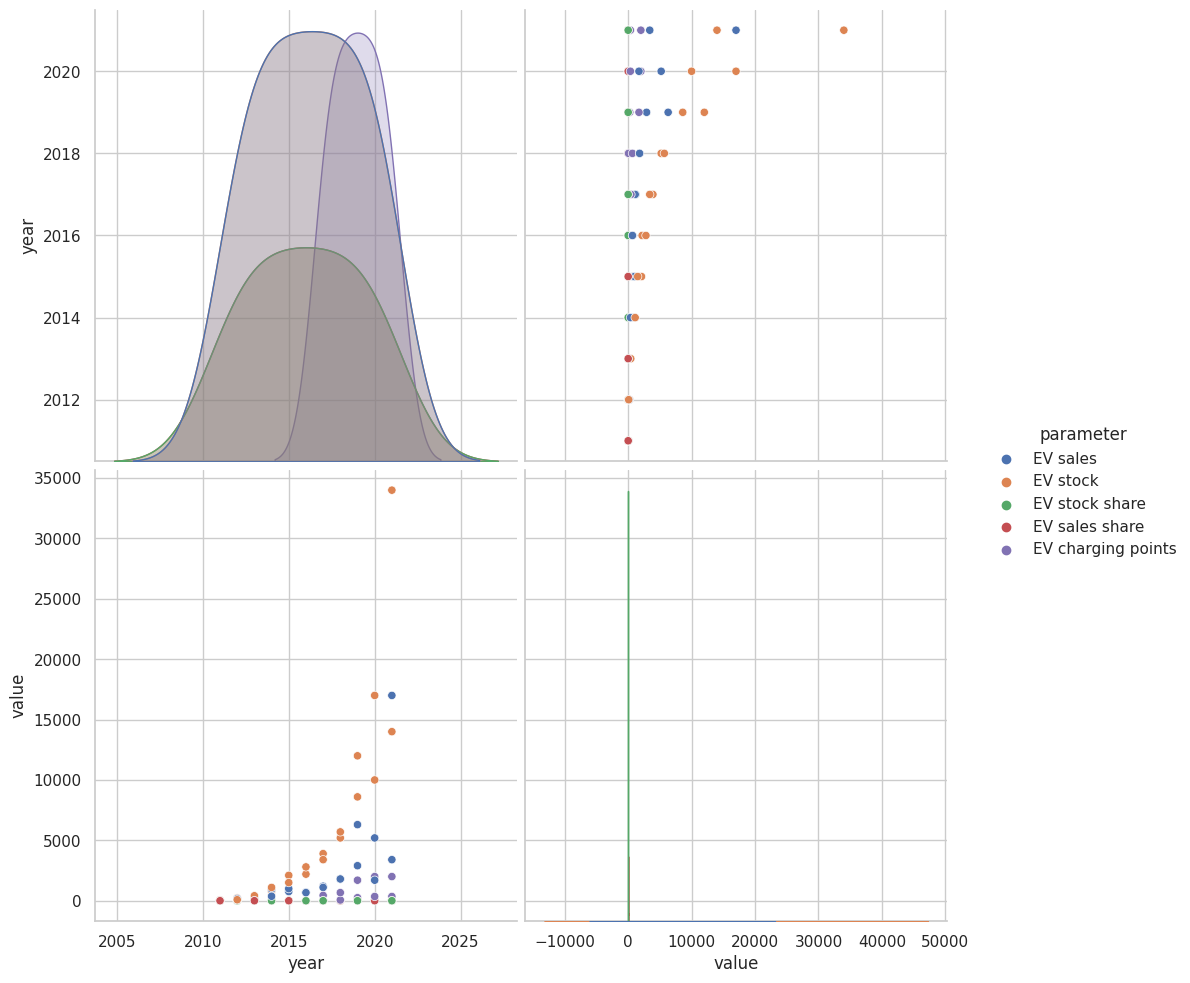

In [52]:
##create pairplots using seaborn for analysis
%matplotlib inline
sns.pairplot(ev_aus_all, hue='parameter', height = 5) # correlation between different variables. 

### Fast and Slow Stations

Let's visualise the change in powertrain and number of EV charging Stations in Australia between 2017 being when EV charging stations were first installed and 2021. Note there is no data or projections on an individual level for 2025 or 2030 so these data points have been left out.   

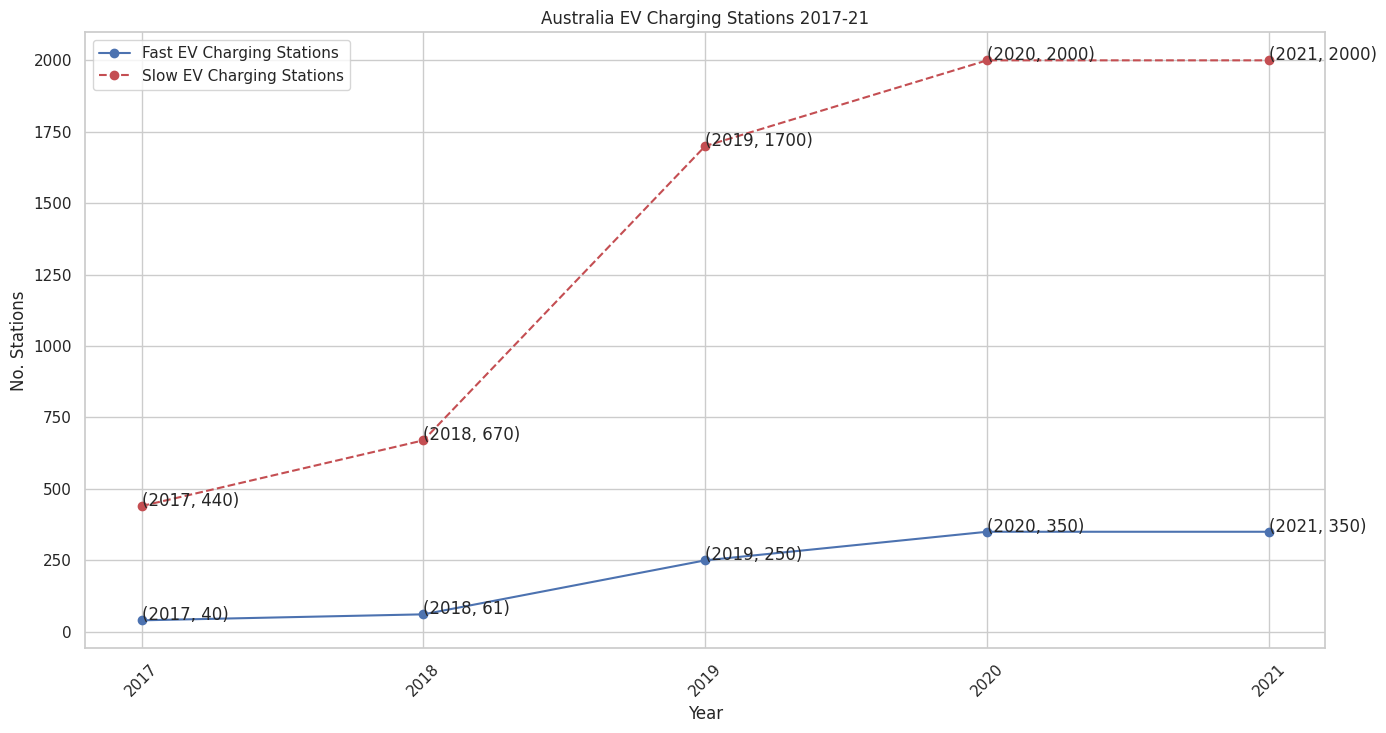

In [53]:
# Create scatterplot showing change in Aus charging stations over time.  
plt.figure(figsize=(16,8))
ev_aus.drop('parameter', axis = 1)
ev_aus_fast = ev_aus[ev_aus['powertrain'] == 'Publicly available fast']
ev_aus_slow = ev_aus[ev_aus['powertrain'] == 'Publicly available slow']

plt.plot(ev_aus_fast.year, ev_aus_fast.value, linestyle='-', marker='o', color='b',  label = 'Fast EV Charging Stations')
plt.plot(ev_aus_slow.year, ev_aus_slow.value, linestyle='--', marker='o', color='r',  label = 'Slow EV Charging Stations')

plt.xlabel("Year")
plt.ylabel("No. Stations")
plt.legend()
plt.title('Australia EV Charging Stations 2017-21')
plt.xticks(ev_aus_fast.year, ev_aus_fast.year, rotation=45)

# Show the data points for comparison of growth 
for xy in zip(ev_aus_fast.year, ev_aus_fast.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)

for xy in zip(ev_aus_slow.year, ev_aus_slow.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)


In [54]:
ev_aus_slow['value'].pct_change(fill_method='ffill')

39         NaN
45    0.522727
55    1.537313
61    0.176471
73    0.000000
Name: value, dtype: float64

In terms of Slow Charging stations: 2018 - 53% and 2019 - 154% saw the biggest percentage increases in slow EV Charging stations. 2020 saw only an increase of 17.6% and 2021 saw no increase, a slowdown most likely explained by the pandemic.  

In [55]:
hello1 = ev_aus_fast['value'].pct_change(fill_method='ffill')
print(hello1)

38         NaN
44    0.525000
54    3.098361
60    0.400000
70    0.000000
Name: value, dtype: float64


In terms of Fast EV Charging Stations: 2018 - 53% and 2019 - 310% saw the biggest percentage increases in fast EV Charging stations. Even During the pandemic in 2020 there was still a large increase in fast charging stations of 40% compared to only 17.6% for slow charging stations showing the demand for faster charges. There was no change between 2020 and 2021 which is most likely explained by the pandemic.  

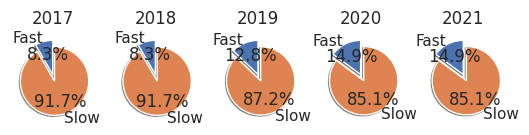

Text(0.5, 0.98, 'Powertrains of Australian EV Charging Stations')

In [56]:
# Create Pie Charts to showing changing Demographics
# Create a Pie Chart
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Fast PowerTrains')
labels = 'Fast', 'Slow'

# Australia EV Charging Stations by each year 
n_21 = ev_aus.loc[ev_aus['year'] == 2021]
n_20 = ev_aus.loc[ev_aus['year'] == 2020]
n_19 = ev_aus.loc[ev_aus['year'] == 2019]
n_18 = ev_aus.loc[ev_aus['year'] == 2018]
n_17 = ev_aus.loc[ev_aus['year'] == 2017]

# create a figure with five subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

# plot each pie chart in a separate subplot
ax1.pie(n_17['value'], explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax1.set_title('2017')
ax2.pie(n_18['value'], explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax2.set_title('2018')
ax3.pie(n_19['value'], explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax3.set_title('2019')
ax4.pie(n_20['value'], explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax4.set_title('2020')
ax5.pie(n_21['value'], explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax5.set_title('2021')

plt.show()
fig.suptitle('Powertrains of Australian EV Charging Stations')

The percentage of fast EV charging powertrains in Australia has increased from 8.3% in 2017 to become 14.9% in 2021. The percentage of fast EV charging stations has increased significantly since 2018 with a corresponding decrease in slow powertrains. It seems there is a trend underway in Australia towards fast powertrains over slow poerstations despite slow stations in general being cheaper. 

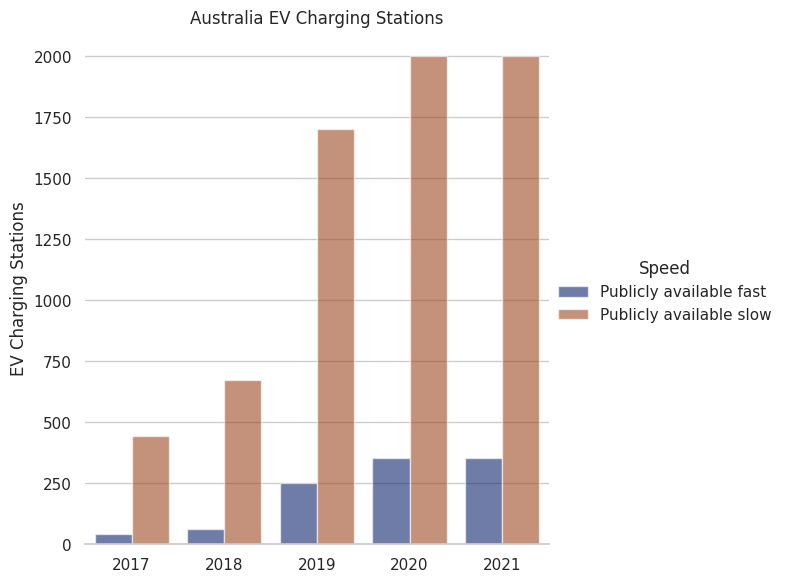

In [57]:
# Create a grouped barplot. 
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot for year and value 
g = sns.catplot(
    data=ev_aus, kind="bar",
    x="year", y="value", hue="powertrain",
    errorbar="sd", palette="dark", alpha=.6, height=6, 
)
g.despine(left=True)
g.set_axis_labels("", "EV Charging Stations")
g.legend.set_title("Speed")
g.set(title = 'Australia EV Charging Stations')

### Total Australian EV Charging Stations

In [58]:
# Creating a new simplified DF for EV charging stations by powertrain in Australia
ev_aus = df[(df['parameter'] == 'EV charging points') & (df['region'] == 'Australia')]
ev_aus = ev_aus.drop(['region', 'category', 'parameter', 
             'mode', 'unit'], axis = 1)
ev_aus = ev_aus.replace( {'Publicly available fast':'Fast', 'Publicly available slow':'Slow'})
ev_aus

,powertrain,year,value
38,Fast,2017,40.0
39,Slow,2017,440.0
44,Fast,2018,61.0
45,Slow,2018,670.0
54,Fast,2019,250.0
55,Slow,2019,1700.0
60,Fast,2020,350.0
61,Slow,2020,2000.0
70,Fast,2021,350.0
73,Slow,2021,2000.0


In [59]:
# Total EV Charging Stations in Australia
ev_aus_total = ev_aus.groupby('year').aggregate('sum')
ev_aus_total = pd.DataFrame(ev_aus_total)
ev_aus_total.columns = ['powertrain', 'value']
ev_aus_total


,powertrain,value
year,,
2017,FastSlow,480.0
2018,FastSlow,731.0
2019,FastSlow,1950.0
2020,FastSlow,2350.0
2021,FastSlow,2350.0


In [60]:
# See percentage change in total Aus. EV Charging Stations
ev_aus_total['value'].pct_change(fill_method='ffill')

year
2017         NaN
2018    0.522917
2019    1.667579
2020    0.205128
2021    0.000000
Name: value, dtype: float64

In Australia, there was a 53% increase from 2017 to 2018. This was followed by a 167% increase in 2018 to 2019 (The largest overall to date). Next was a 20.5% increase in 2020 and no data in 2021 due to the pandemic.  

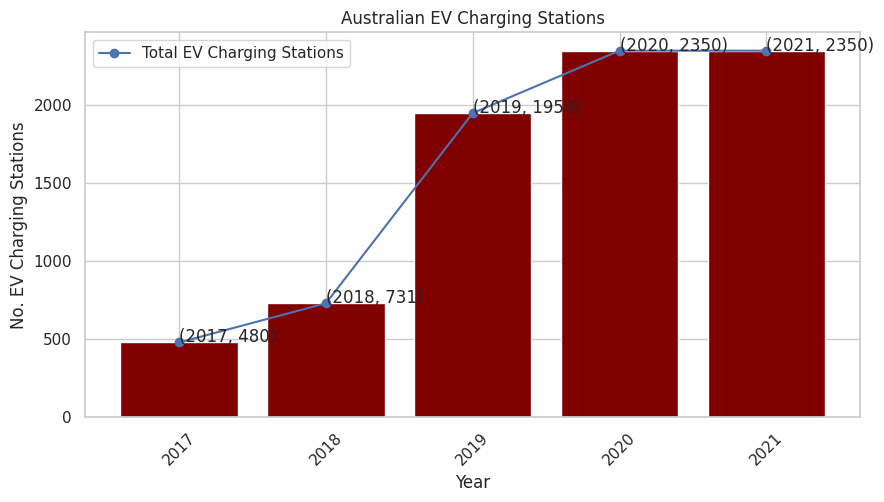

In [61]:
# Create a Plot
plt.figure(figsize=(10,5))
plt.plot(ev_aus_total.index, ev_aus_total.value, linestyle='-', marker='o', color='b',  label = 'Total EV Charging Stations')

plt.xlabel("Year")
plt.ylabel("No. Stations")
plt.legend()
plt.title('Australia EV Charging Stations 2017-21')
plt.xticks(ev_aus_fast.year, ev_aus_fast.year, rotation=45)

# Show the data points for comparison of growth 
for xy in zip(ev_aus_total.index, ev_aus_total.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)

# Create Basic barplot and set labels
plt.bar(ev_aus_total.index, ev_aus_total.value, color = 'maroon', width=0.8, align='center')
plt.xlabel("Year")
plt.ylabel("No. EV Charging Stations")
plt.title("Australian EV Charging Stations")
plt.show()

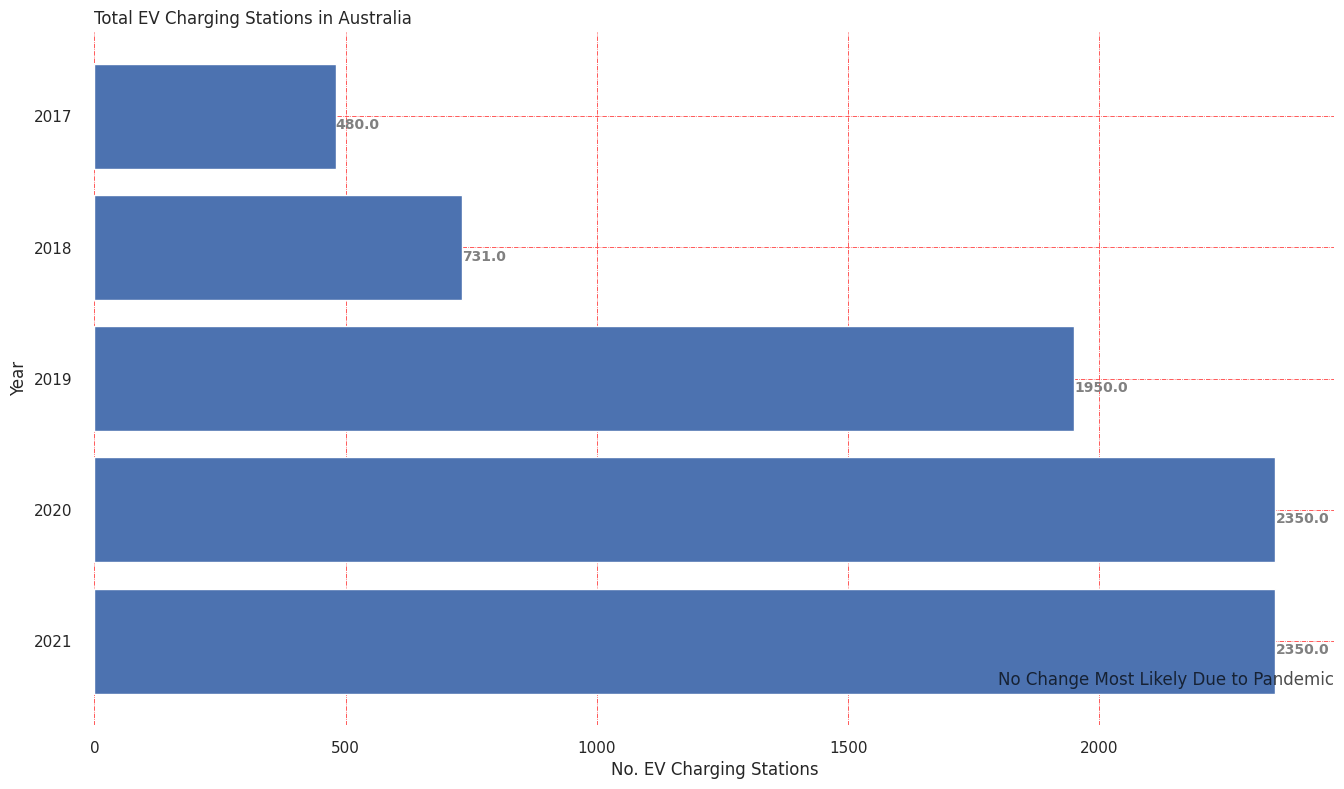

In [62]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(ev_aus_total.index, ev_aus_total.value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.9)
 
# Show top values
ax.invert_yaxis()

# Axis labels
plt.xlabel("No. EV Charging Stations")
plt.ylabel("Year")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Total EV Charging Stations in Australia',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'No Change Most Likely Due to Pandemic', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

<Axes: >

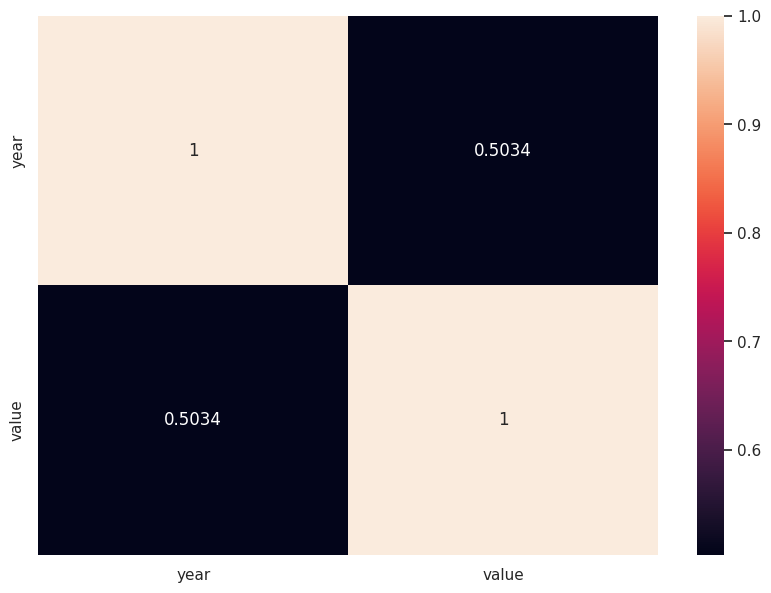

In [63]:
# sns.barplot(data=ev_aus_total, x="year", y="value", errorbar="sd")
# ax = sns.barplot(data=ev_aus_total, x='powertrain', y='value', hue='card_name')
ev_aus_total2 = ev_aus.drop('powertrain', axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(ev_aus_total2.corr(), fmt='.4g', annot=True)

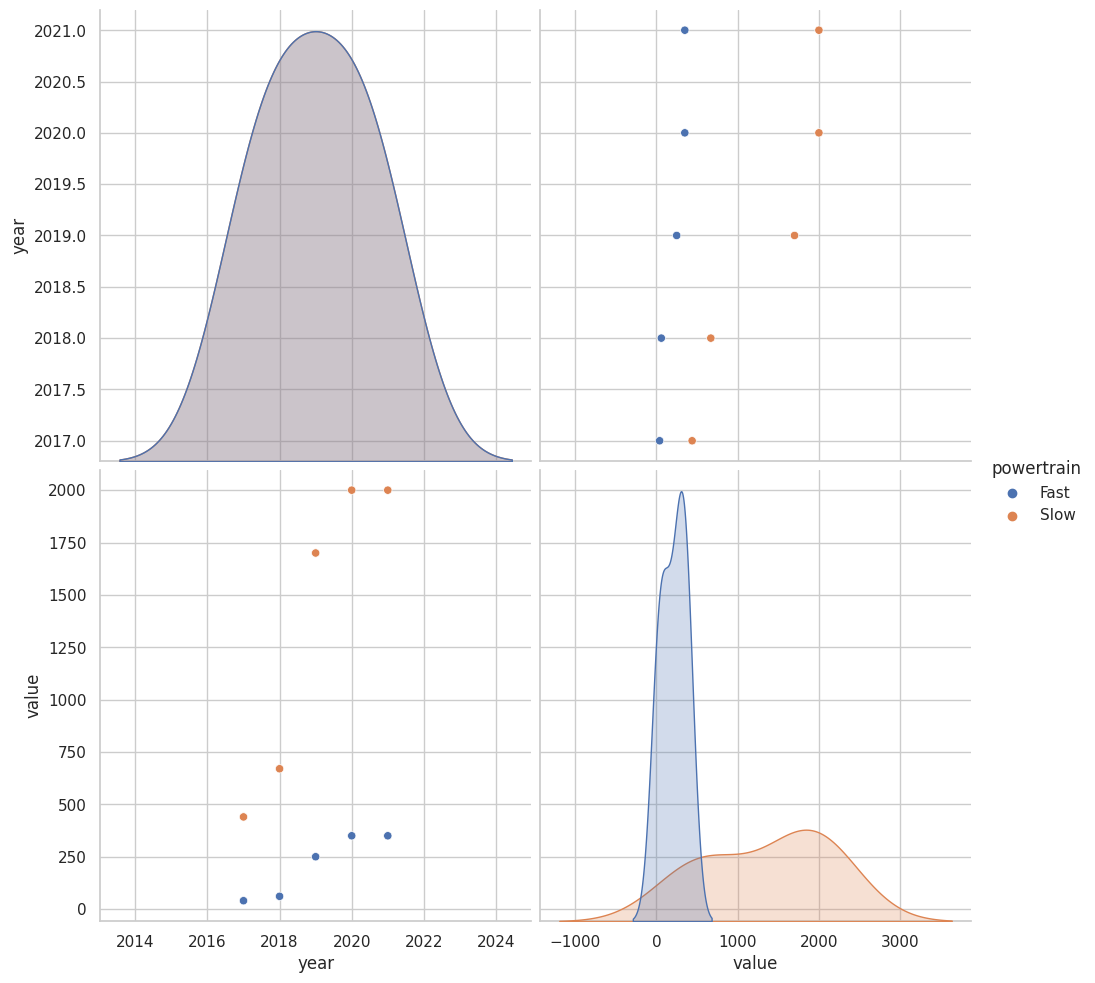

In [64]:
##create pairplots using seaborn
%matplotlib inline
sns.pairplot(ev_aus, hue='powertrain', height = 5) # correlation between different variables. 

Overall 2018 and 2019 saw the most visible increases in EV charging stations in Australia with a huge decrease after the pandemic. This can be explained by restrictions on International Trade and lockdowns so people could not purchase cars and government spending was elsewhere. From the correlation plots approximately 50.34% of the variation in the EV charging stations can be explained by the increase in year. It appears there are many other factors at play that have not been identified in this dataset. 

### Conclusion Australian EV Charging Station Data

It appears that a significant amount of the variation in the amount of EV charging stations being 50.34% can be explained by the increase in year. From research despite the higher cost of a fast EV charging station compared to the slow EV charging station as the years have passed more consumers have opted for fast charging stations. They now make up a much more significant share being approximately 15% of all EV Charging stations compared to approximately 8% in 2017. This share seems likely to continue to grow in the near future. Fast stations are also exhibiting higher percentage growth year on year than slower charging stations. 

Another interesting insight is that there was no change in this data set between the amount of EV Charging stations in 2020 and 2021. This is most likely due to the Pandemic with lockdowns, lost business and significant restrictions on global trade stopping money altogether being spent on EV Charging stations. However, further research to see if this is due to other factors would also be interesting. Analysing the difference between 2021 to 2022 and 2022 to 2023 will be particularly interesting to see if there has been a significant increase in growth as the pandemic has subsided. 

A final key insight is only around 50% of the variation in charging points is captured by the increase in year. As such, there is ample opportunities for further research to see what other factors influence variation in EV charging stations within Australia, very warranted research to help increase adoption and enhance environmental sustainability. While analysing this dataset was interesting it was somewhat too basic. The data set gives a good overview of the growth of EV Charging stations around Australia. However, it needs to be analysed in conjunction with other data sets and many more features explored for much more meaningful insights.  

## EV Car Sales in Australia

Let's now analyse the growth in EV Sales within Australia from 2011 when we commenced to have data to 2021 the last year of Data. Let's look at the different powertrains and also the increase in sales by powertrain per year. 

In [65]:
# Select Australia
aus = df[df['region'] == 'Australia']


count = aus.powertrain.unique()
print("Unique values count : "+ str(count))
print('\n' + 'Summary of EV Data from Australia:' + '\n\n')
print(aus)


Unique values count : ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']

Summary of EV Data from Australia:


       region    category           parameter  mode               powertrain   
0   Australia  Historical            EV sales  Cars                      BEV  \
1   Australia  Historical            EV stock  Cars                      BEV   
2   Australia  Historical      EV stock share  Cars                       EV   
3   Australia  Historical      EV sales share  Cars                       EV   
4   Australia  Historical      EV sales share  Cars                       EV   
..        ...         ...                 ...   ...                      ...   
69  Australia  Historical            EV stock  Cars                      BEV   
70  Australia  Historical  EV charging points    EV  Publicly available fast   
71  Australia  Historical      EV sales share  Cars                       EV   
72  Australia  Historical      EV stock share  Cars                 

It appears there are two types of Electric Vehicle sales which are significant in Australia. These are PHEVs (Plug in Hybrid Electric Vehicles) along with BEVs (Battery electric vehicles). From the below graph BEVs are exhibiting much higher growth in Australia than PHEVs.

In [66]:
# Select EV Sales in Australia & Drop unrequired columns
ev_aus_sales = aus[(aus['parameter'] == 'EV sales')]
ev_aus_sales = ev_aus_sales.drop(['category', 'mode', 'unit', 'parameter'], axis = 'columns')

count = ev_aus_sales.powertrain.unique()
print("Unique values for EV Sales: "+ str(count))
print('\n' + 'Total EV Sales in Australia by Year:' + '\n')
ev_aus_sales_year = ev_aus_sales.groupby('year').aggregate('sum')
ev_aus_sales_year = ev_aus_sales_year.drop(['region', 'powertrain'], axis = 'columns')
ev_aus_sales_year['PCT change %'] = (ev_aus_sales_year['value'].pct_change(fill_method='ffill')) * 100
ev_aus_sales_year['Sales Growth'] = (ev_aus_sales_year['value'] - ev_aus_sales_year['value'].shift(1))
print(ev_aus_sales_year.head(11))

print('\n' + 'Summary statistics on EV Sales in Australia:')
ev_aus_sales_year.describe()

Unique values for EV Sales: ['BEV' 'PHEV']

Total EV Sales in Australia by Year:

        value  PCT change %  Sales Growth
year                                     
2011     49.0           NaN           NaN
2012    250.0    410.204082         201.0
2013    290.0     16.000000          40.0
2014   1320.0    355.172414        1030.0
2015   1760.0     33.333333         440.0
2016   1370.0    -22.159091        -390.0
2017   2300.0     67.883212         930.0
2018   3600.0     56.521739        1300.0
2019   9200.0    155.555556        5600.0
2020   6900.0    -25.000000       -2300.0
2021  20400.0    195.652174       13500.0

Summary statistics on EV Sales in Australia:


,value,PCT change %,Sales Growth
count,11.000000,10.000000,10.000000
mean,4312.636364,124.316342,2035.100000
std,6074.032800,153.707002,4490.572605
min,49.000000,-25.000000,-2300.000000
25%,805.000000,20.333333,80.250000
50%,1760.000000,62.202475,685.000000
75%,5250.000000,185.628019,1232.500000
max,20400.000000,410.204082,13500.000000


From observing the above table. The biggest percentage growth in sales of EV charging stations occured between 2013 and 2014,. This was followed by growths in between 2018 and 2019 along with 2020 and 2021. There was a particularly strong rebound after the pandemic wtih an increase in sales of Electric Vehicles of 13,500 within Australia. The biggest decrease in sales came between 2019 and 2020 most likely due to the pandemic. Interestingly 2015 and 2016 had an as yet unexplained decrease. 

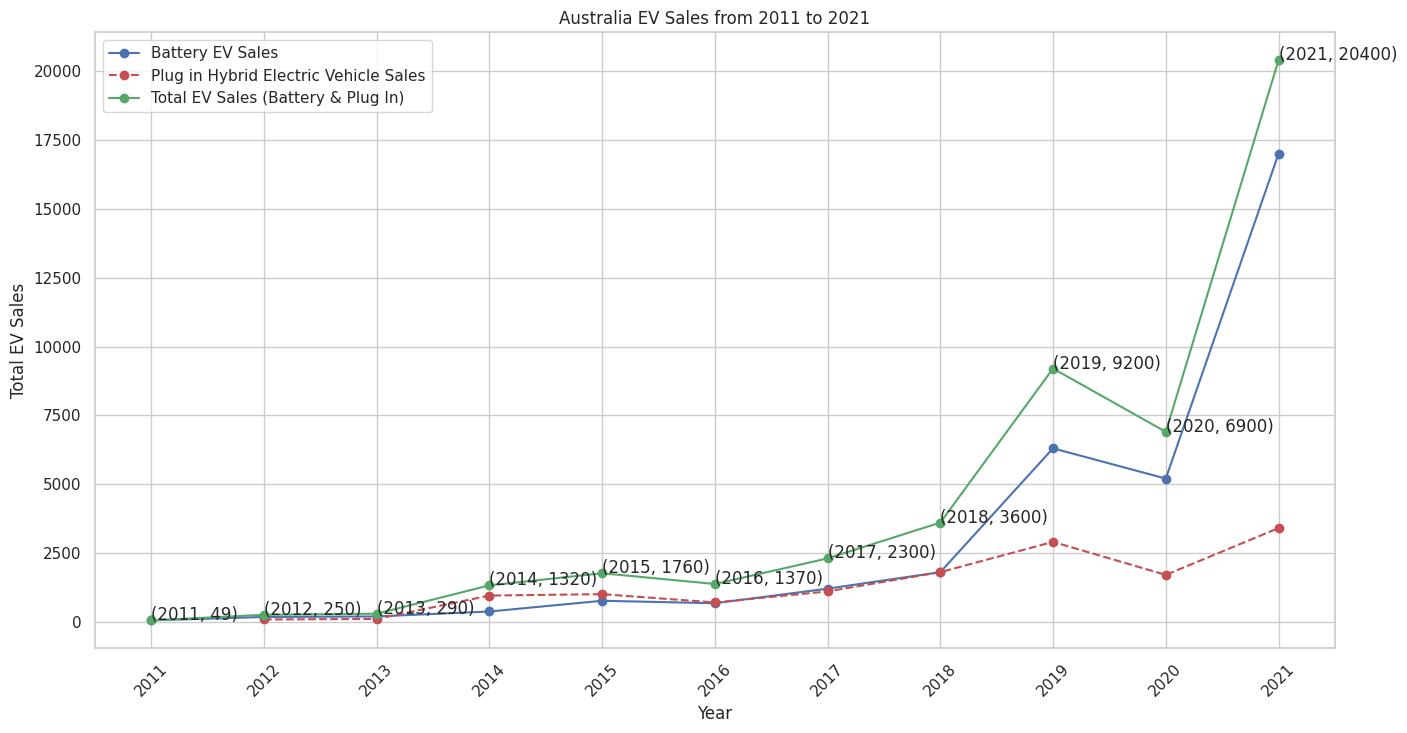

In [67]:
# Create scatterplot showing change in Aus EV Sales over time.  
plt.figure(figsize=(16,8))
ev_aus_BEV = ev_aus_sales[ev_aus_sales['powertrain'] == 'BEV']
ev_aus_PHEV = ev_aus_sales[ev_aus_sales['powertrain'] == 'PHEV']

#Create plots 
plt.plot(ev_aus_BEV.year, ev_aus_BEV.value, linestyle='-', marker='o', color='b',  label = 'Battery EV Sales')
plt.plot(ev_aus_PHEV.year, ev_aus_PHEV.value, linestyle='--', marker='o', color='r',  label = 'Plug in Hybrid Electric Vehicle Sales')
plt.plot(ev_aus_sales_year.index, ev_aus_sales_year.value, linestyle='solid', marker='o', color='g',  label = 'Total EV Sales (Battery & Plug In)')

# Set up the graph and label
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.legend()
plt.title('Australia EV Sales from 2011 to 2021')
plt.xticks(ev_aus_BEV.year, ev_aus_BEV.year, rotation=45)

# Show the data points of total EV Sales in Australia 
for xy in zip(ev_aus_sales_year.index, ev_aus_sales_year.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)


In [68]:
# Growth of BEV Vehicle Sales within Australia
ev_aus_BEV['PCT change %'] = (ev_aus_BEV['value'].pct_change(fill_method='ffill')) * 100
ev_aus_BEV['Sales Growth'] = (ev_aus_BEV['value'] - ev_aus_BEV['value'].shift(1))
# ev_aus_BEV = ev_aus_BEV.drop(['region'], axis= 'columns')
print('Table of growth in BEV Sales in Australia')
print(ev_aus_BEV)
print('\n')
print('Summary statistics on BEV Growth in Australia:')
ev_aus_BEV.describe()


Table of growth in BEV Sales in Australia
       region powertrain  year    value  PCT change %  Sales Growth
0   Australia        BEV  2011     49.0           NaN           NaN
8   Australia        BEV  2012    170.0    246.938776         121.0
11  Australia        BEV  2013    190.0     11.764706          20.0
20  Australia        BEV  2014    370.0     94.736842         180.0
23  Australia        BEV  2015    760.0    105.405405         390.0
32  Australia        BEV  2016    670.0    -11.842105         -90.0
35  Australia        BEV  2017   1200.0     79.104478         530.0
48  Australia        BEV  2018   1800.0     50.000000         600.0
51  Australia        BEV  2019   6300.0    250.000000        4500.0
64  Australia        BEV  2020   5200.0    -17.460317       -1100.0
67  Australia        BEV  2021  17000.0    226.923077       11800.0


Summary statistics on BEV Growth in Australia:


,year,value,PCT change %,Sales Growth
count,11.000000,11.000000,10.000000,10.000000
mean,2016.000000,3064.454545,103.557086,1695.100000
std,3.316625,5082.726657,103.900879,3841.511579
min,2011.000000,49.000000,-17.460317,-1100.000000
25%,2013.500000,280.000000,21.323529,45.250000
50%,2016.000000,760.000000,86.920660,285.000000
75%,2018.500000,3500.000000,196.543659,582.500000
max,2021.000000,17000.000000,250.000000,11800.000000


The biggest percentage change in the growth of BEV vehicles came between 2020-2021 along with 2018-19.  Fairly high growth was also exhibited between 2013-15. The biggest jump in BEV sales came between 2020 to 2021.

In [69]:

# Growth of PHEV Vehicle Sales within Australia
ev_aus_PHEV['PCT change %'] = (ev_aus_PHEV['value'].pct_change(fill_method='ffill')) * 100
ev_aus_PHEV['Sales Growth'] = (ev_aus_PHEV['value'] - ev_aus_PHEV['value'].shift(1))
# ev_aus_BEV = ev_aus_BEV.drop(['region'], axis= 'columns')
print('Table of growth in PHEV Sales in Australia')
print(ev_aus_PHEV)
print('\n')
print('Summary statistics on PHEV Growth in Australia:')
ev_aus_PHEV.describe()


Table of growth in PHEV Sales in Australia
       region powertrain  year   value  PCT change %  Sales Growth
7   Australia       PHEV  2012    80.0           NaN           NaN
12  Australia       PHEV  2013   100.0     25.000000          20.0
19  Australia       PHEV  2014   950.0    850.000000         850.0
24  Australia       PHEV  2015  1000.0      5.263158          50.0
31  Australia       PHEV  2016   700.0    -30.000000        -300.0
36  Australia       PHEV  2017  1100.0     57.142857         400.0
47  Australia       PHEV  2018  1800.0     63.636364         700.0
52  Australia       PHEV  2019  2900.0     61.111111        1100.0
63  Australia       PHEV  2020  1700.0    -41.379310       -1200.0
68  Australia       PHEV  2021  3400.0    100.000000        1700.0


Summary statistics on PHEV Growth in Australia:


,year,value,PCT change %,Sales Growth
count,10.00000,10.00000,9.000000,9.000000
mean,2016.50000,1373.00000,121.197131,368.888889
std,3.02765,1098.86861,277.176773,850.050652
min,2012.00000,80.00000,-41.379310,-1200.000000
25%,2014.25000,762.50000,5.263158,20.000000
50%,2016.50000,1050.00000,57.142857,400.000000
75%,2018.75000,1775.00000,63.636364,850.000000
max,2021.00000,3400.00000,850.000000,1700.000000


The largest change in the percentage frowth of PHEV vehicles occured between 2013-2014. Since then the percentage of sales has been decreasing with moderate sales between 2016-2019 before the pandemic. Mean growth per year was 121% and 369 vehicles. The slowdown in growth since 2015 shows that PHEVs have steadily become less popular in Australia than BEV EVs. 

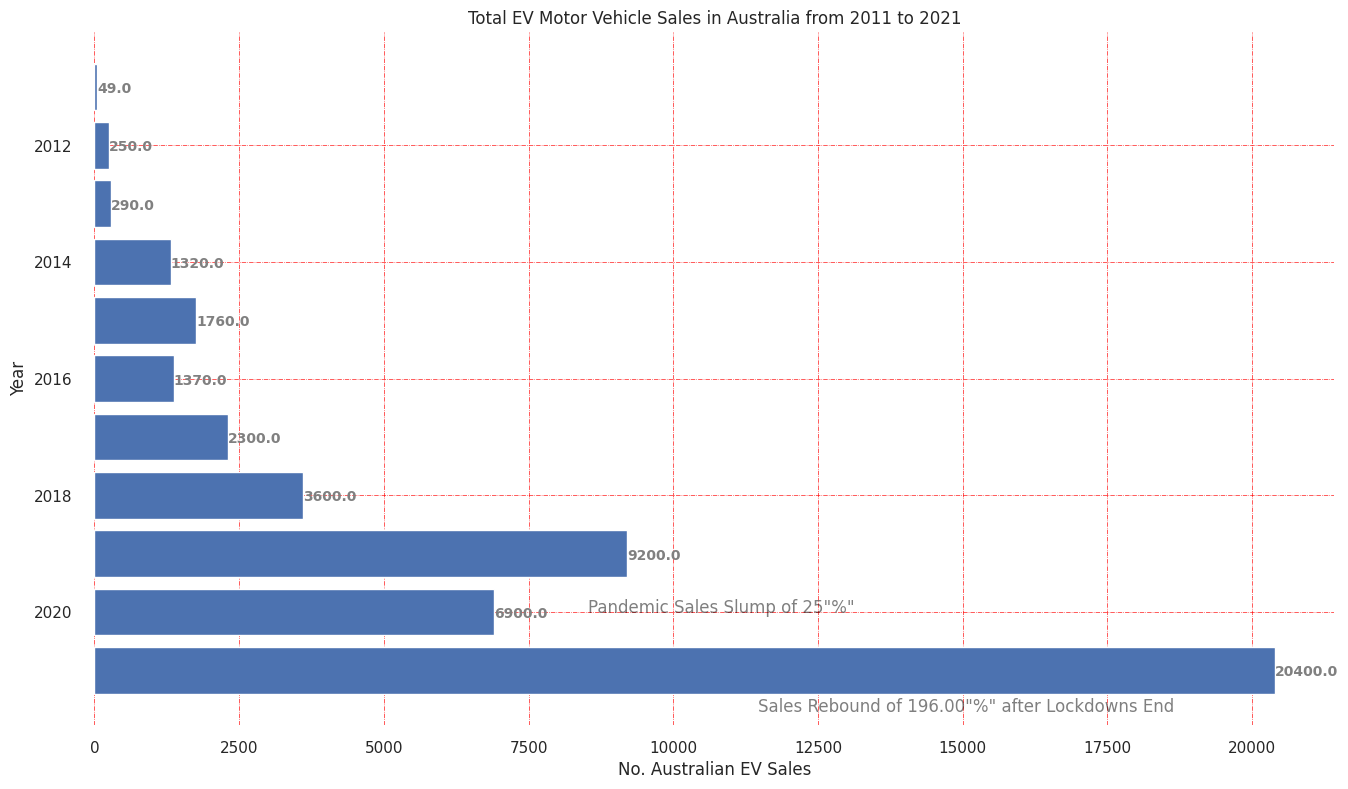

In [70]:
# CREATING A HORIZONTAL BAR PLOT
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(ev_aus_sales_year.index, ev_aus_sales_year.value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.9)
 
# Show top values
ax.invert_yaxis()

# Axis labels
plt.xlabel("No. Australian EV Sales")
plt.ylabel("Year")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Total EV Motor Vehicle Sales in Australia from 2011 to 2021',
             loc ='center', )
 
# Add Text watermark for Sales Pandemic Slump
fig.text(0.6, 0.23, 'Pandemic Sales Slump of 25"%"', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.5)

# Add Text watermark for sales rebound at the end of Lockdowns
fig.text(0.8, 0.12, 'Sales Rebound of 196.00"%" after Lockdowns End', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.5)
 
# Show Plot
plt.show()

Head of the dataframe:
       region powertrain  year  value
0   Australia        BEV  2011   49.0
7   Australia       PHEV  2012   80.0
8   Australia        BEV  2012  170.0
11  Australia        BEV  2013  190.0
12  Australia       PHEV  2013  100.0



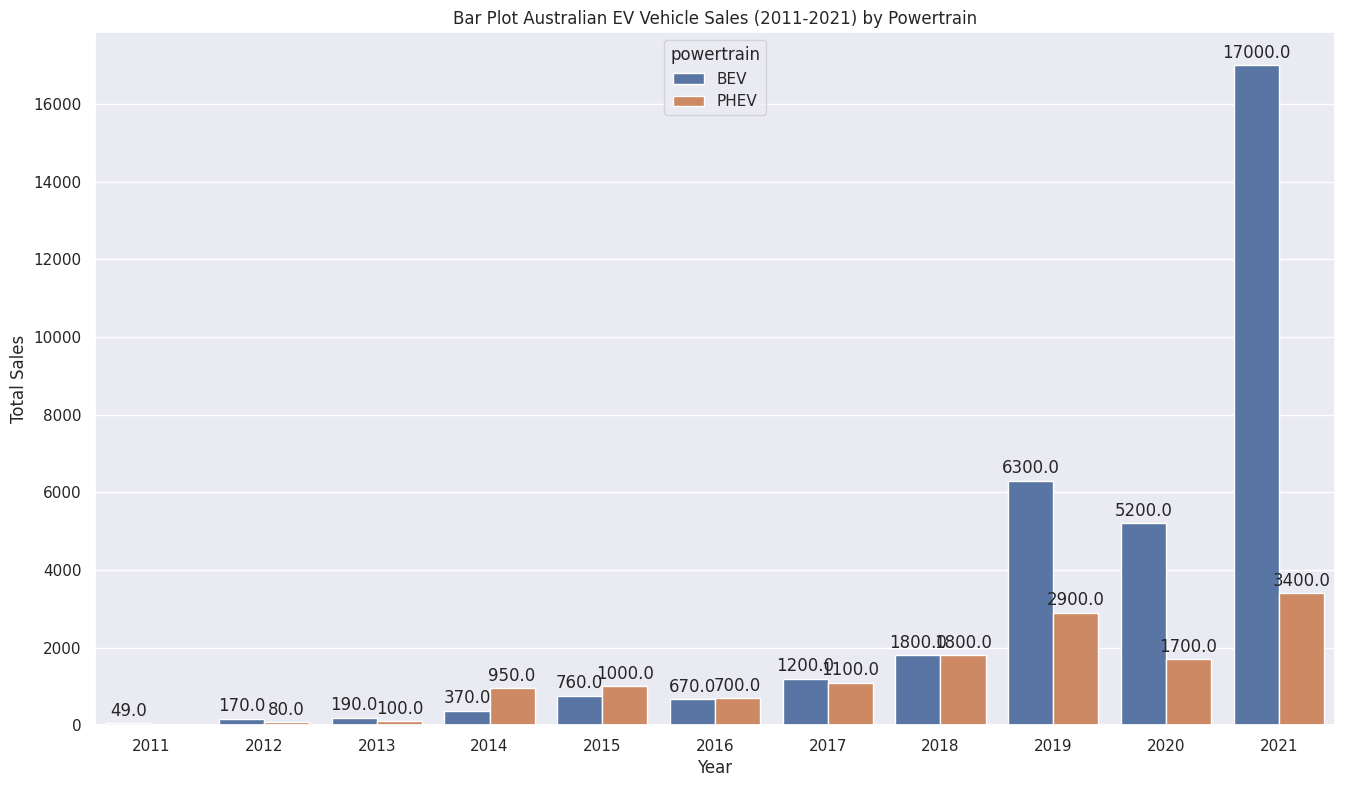

In [71]:
# Create a Seaborn Barplot
print('Head of the dataframe:')
print(ev_aus_sales.head())
print() 
sns.set(rc={'figure.figsize':(16,9)})
bar = sns.barplot(data = ev_aus_sales, x = 'year', y = 'value', hue = 'powertrain', errorbar='sd')
bar.set_title('Bar Plot Australian EV Vehicle Sales (2011-2021) by Powertrain')
bar.set_ylabel('Total Sales')
bar.set_xlabel('Year')

# Add data point to the bars
for p in bar.patches:
    bar.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')



The above seaborn graphic shows the substantial growth in BEVs since 2018. They are now clearly the preferred powertrain for EV sales within Australia, accounting for a growing percentage of EV sales and the vast majority of sales growth between 2020 and 2021. 

In [72]:
# Mean Calculations
# Show the data points of EV Sales by powertrain in Australia 
means1 = ev_aus_PHEV.groupby('year')['value'].mean()
print('Mean powertrain growth of EV Vehicle Sales in Australia:')
print(means1)
print('\n' + 'Mean powertrain percentage growth of EV Vehicle Sales in Australia:')
print(means1.pct_change()*100)

Mean powertrain growth of EV Vehicle Sales in Australia:
year
2012      80.0
2013     100.0
2014     950.0
2015    1000.0
2016     700.0
2017    1100.0
2018    1800.0
2019    2900.0
2020    1700.0
2021    3400.0
Name: value, dtype: float64

Mean powertrain percentage growth of EV Vehicle Sales in Australia:
year
2012           NaN
2013     25.000000
2014    850.000000
2015      5.263158
2016    -30.000000
2017     57.142857
2018     63.636364
2019     61.111111
2020    -41.379310
2021    100.000000
Name: value, dtype: float64


In [73]:
# Median Calculations
# Show the data points of EV Sales by powertrain in Australia 
median1 = ev_aus_PHEV.groupby('year')['value'].median()
print('Median powertrain growth of EV Vehicle Sales in Australia:')
print(median1)
print('\n' + 'Median powertrain percentage growth of EV Vehicle Sales in Australia:')
print(median1.pct_change()*100)

Median powertrain growth of EV Vehicle Sales in Australia:
year
2012      80.0
2013     100.0
2014     950.0
2015    1000.0
2016     700.0
2017    1100.0
2018    1800.0
2019    2900.0
2020    1700.0
2021    3400.0
Name: value, dtype: float64

Median powertrain percentage growth of EV Vehicle Sales in Australia:
year
2012           NaN
2013     25.000000
2014    850.000000
2015      5.263158
2016    -30.000000
2017     57.142857
2018     63.636364
2019     61.111111
2020    -41.379310
2021    100.000000
Name: value, dtype: float64


Mean growth has been steadily increasing over the last 12 years. The same figures are reported for median growth since there are only two figures. The only exception has been the pandemic where there was a decline due to the Economy. Percentage mean growth had the highest increase between 2013 and 204 showing this was probably the year when EV charging stations came into the market. Therefore this yearly transition marked the biggest increase in EV Sales within Australia, when they went mainstream. 2020 and 2021 was the year when growth incraesed by an average of 100%. However, this was due to an explosion in relation to BEV Vehicles rather than PHEV vehicles which are steadily decreasing as a percentage of popularity. 

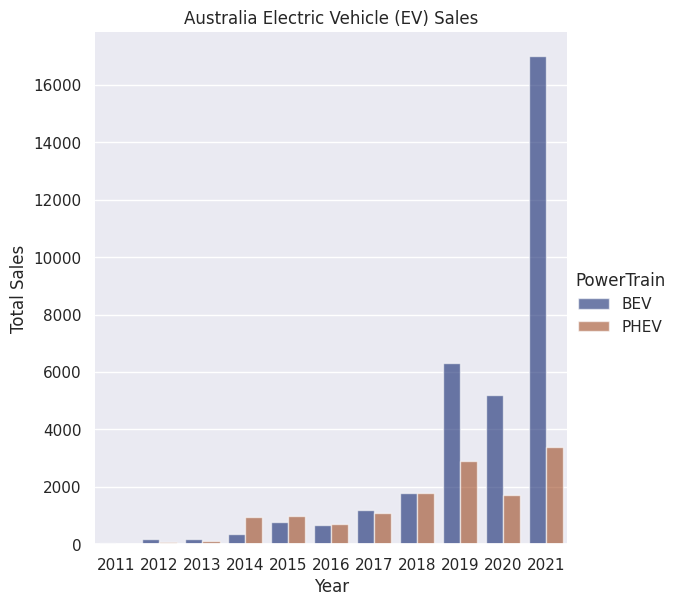

In [74]:
# Create a grouped Catplot from Seaborn for a similar Barplot comparison. 
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16,9)})


# Draw a nested barplot for year and value 
g = sns.catplot(
    data=ev_aus_sales, kind="bar",
    x="year", y="value", hue="powertrain",
    errorbar="sd", palette="dark", alpha=.6, height=6, 
)
g.despine(left=True)
g.set_axis_labels("Year", "Total Sales")
g.legend.set_title("PowerTrain")
g.set(title = 'Australia Electric Vehicle (EV) Sales')


Text(0.5, 65.24999999999999, 'Year')

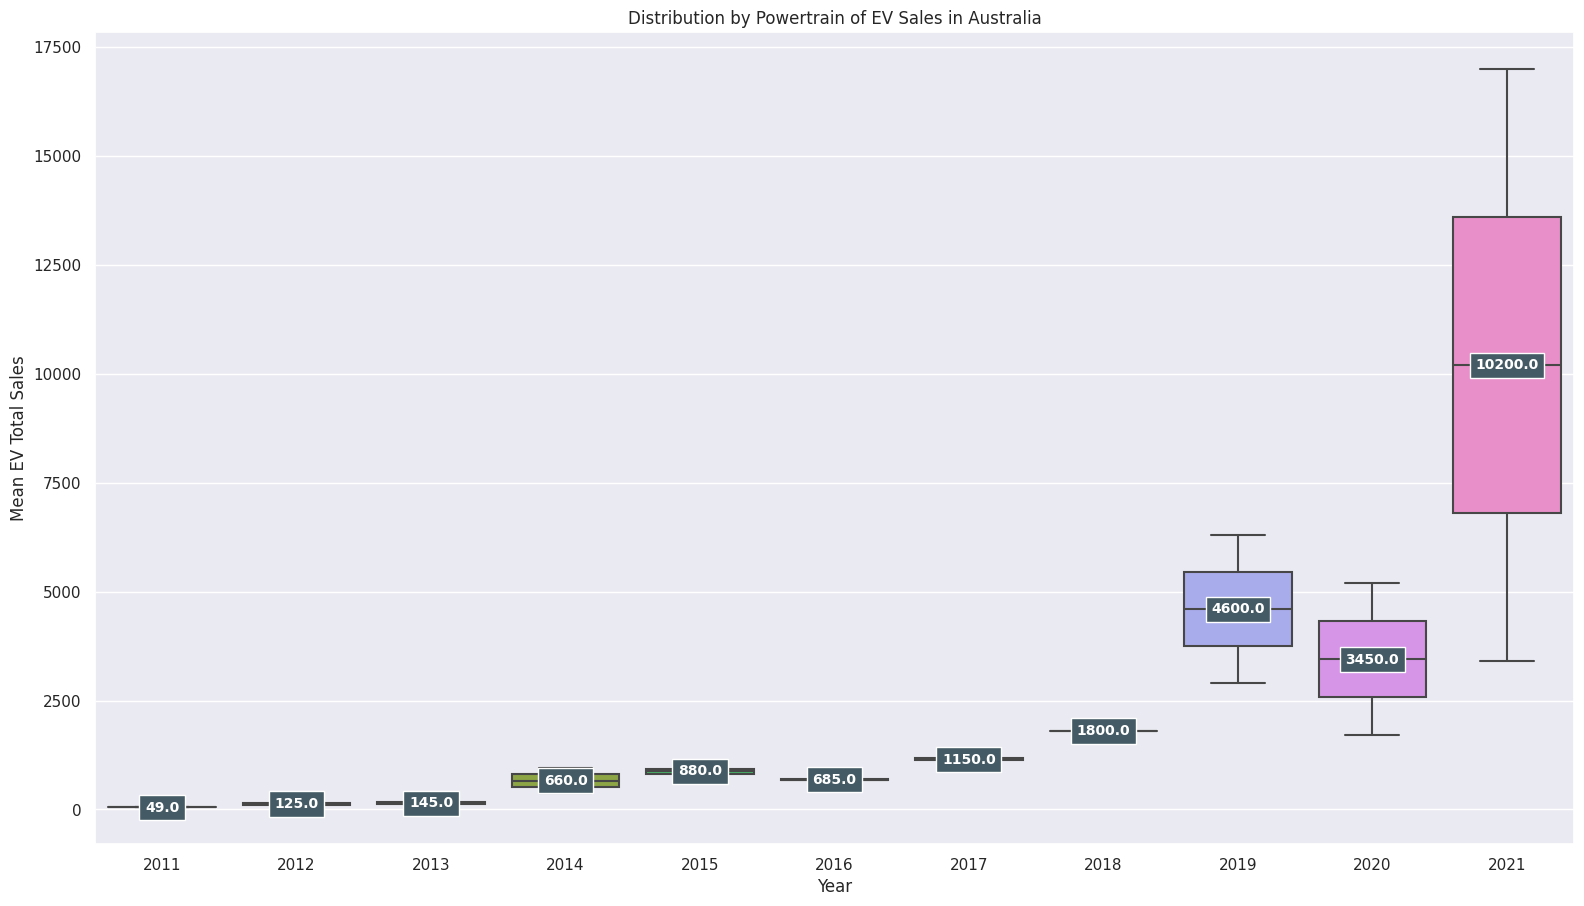

In [75]:
# Comparison of increasing variance in EV Sales by Powertrain 

# Create a seaborn boxplot
box = sns.boxplot(data = ev_aus_sales, x = 'year', y = 'value')

# Add data labels
ax = box.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box.figure.tight_layout()

# Add axis labels
box.set_title('Distribution by Powertrain of EV Sales in Australia')
box.set_ylabel('Mean EV Total Sales')
box.set_xlabel('Year')

The box plot only exhibits two variables being the sales of EV Vehicles with both powertrains. Nevertheless it exhibits an interesting phenomenon. This is that initially the sales of PHEV and BEV Vehicles was very similar from 2011 to 2013. Sales by battery type were then approximately equal between 2016 and 2017. After these years however, from 2018 to 2021 there has been a huge increase in the popularity of BEV Vehicles within Australia over PHEV. A likely explanation is the increase in the battery power and capabilities, price reductions in EV Vehicles with batteries along with ease of use of having a battery compared to a PHEV vehicle. 

## EDA on EV Stock in Australia

In [76]:
# Select all stock of EV Vehicles in Australia & drop unrequired columns
aus_stock = df.loc[df['region'] == 'Australia']
aus_stock = aus_stock.loc[aus_stock['parameter'] == 'EV stock']
aus_stock = aus_stock.drop(['region','category','parameter', 'mode', 'unit'], axis = 'columns')
aus_stock

,powertrain,year,value
1,BEV,2011,49.0
6,BEV,2012,220.0
9,PHEV,2012,80.0
10,PHEV,2013,180.0
13,BEV,2013,410.0
18,BEV,2014,780.0
21,PHEV,2014,1100.0
22,PHEV,2015,2100.0
25,BEV,2015,1500.0
30,BEV,2016,2200.0


In [77]:
# Growth of BEV Vehicle Sales within Australia
aus_stock_BEV = aus_stock[aus_stock['powertrain'] == 'BEV']
aus_stock_BEV
aus_stock_BEV['PCT change %'] = (aus_stock_BEV['value'].pct_change(fill_method='ffill')) * 100
aus_stock_BEV['Stock Growth'] = (aus_stock_BEV['value'] - aus_stock_BEV['value'].shift(1))
print('Table of growth in BEV Sales in Australia')
print(aus_stock_BEV)
print('\n')
print('Summary statistics on BEV Growth in Australia:')
aus_stock_BEV.describe()


Table of growth in BEV Sales in Australia
   powertrain  year    value  PCT change %  Stock Growth
1         BEV  2011     49.0           NaN           NaN
6         BEV  2012    220.0    348.979592         171.0
13        BEV  2013    410.0     86.363636         190.0
18        BEV  2014    780.0     90.243902         370.0
25        BEV  2015   1500.0     92.307692         720.0
30        BEV  2016   2200.0     46.666667         700.0
37        BEV  2017   3400.0     54.545455        1200.0
46        BEV  2018   5200.0     52.941176        1800.0
53        BEV  2019  12000.0    130.769231        6800.0
62        BEV  2020  17000.0     41.666667        5000.0
69        BEV  2021  34000.0    100.000000       17000.0


Summary statistics on BEV Growth in Australia:


,year,value,PCT change %,Stock Growth
count,11.000000,11.000000,10.000000,10.000000
mean,2016.000000,6978.090909,104.448402,3395.100000
std,3.316625,10487.545094,90.435904,5279.558072
min,2011.000000,49.000000,41.666667,171.000000
25%,2013.500000,595.000000,53.342246,452.500000
50%,2016.000000,2200.000000,88.303769,960.000000
75%,2018.500000,8600.000000,98.076923,4200.000000
max,2021.000000,34000.000000,348.979592,17000.000000


In [78]:
# Growth of PHEV Vehicle Sales within Australia
aus_stock_PHEV = aus_stock[aus_stock['powertrain'] == 'PHEV']
aus_stock_PHEV
aus_stock_PHEV['PCT change %'] = (aus_stock_PHEV['value'].pct_change(fill_method='ffill')) * 100
aus_stock_PHEV['Stock Growth'] = (aus_stock_PHEV['value'] - aus_stock_PHEV['value'].shift(1))
print('Table of growth in PHEV Sales in Australia')
print(aus_stock_PHEV)
print('\n')
print('Summary statistics on PHEV Growth in Australia:')
print(aus_stock_PHEV.describe())

Table of growth in PHEV Sales in Australia
   powertrain  year    value  PCT change %  Stock Growth
9        PHEV  2012     80.0           NaN           NaN
10       PHEV  2013    180.0    125.000000         100.0
21       PHEV  2014   1100.0    511.111111         920.0
22       PHEV  2015   2100.0     90.909091        1000.0
33       PHEV  2016   2800.0     33.333333         700.0
34       PHEV  2017   3900.0     39.285714        1100.0
49       PHEV  2018   5700.0     46.153846        1800.0
50       PHEV  2019   8600.0     50.877193        2900.0
65       PHEV  2020  10000.0     16.279070        1400.0
66       PHEV  2021  14000.0     40.000000        4000.0


Summary statistics on PHEV Growth in Australia:
             year         value  PCT change %  Stock Growth
count    10.00000     10.000000      9.000000      9.000000
mean   2016.50000   4846.000000    105.883262   1546.666667
std       3.02765   4670.494145    155.507555   1206.067991
min    2012.00000     80.000000     16.2

In [79]:
aus_stock_year = aus_stock.groupby('year').aggregate('sum')
aus_stock_year = aus_stock_year.drop(['powertrain'], axis='columns')
aus_stock_year['PCT change %'] = (aus_stock_year['value'].pct_change(fill_method='ffill')) * 100
aus_stock_year['Stock Growth'] = (aus_stock_year['value'] - aus_stock_year['value'].shift(1))
print('Summary statistics on Total EV Stock Growth in Australia:')
print(aus_stock_year.describe())
print('\n\n' + 'Summary table of EV Vehicle Stock in Australia: ')
print(aus_stock_year)

Summary statistics on Total EV Stock Growth in Australia:
              value  PCT change %  Stock Growth
count     11.000000     10.000000     10.000000
mean   11383.545455    125.108552   4795.100000
std    14986.523021    146.206705   6421.316591
min       49.000000     31.067961    251.000000
25%     1235.000000     46.828767   1317.500000
50%     5000.000000     83.384302   2010.000000
75%    15750.000000     95.372340   5700.000000
max    48000.000000    512.244898  21000.000000


Summary table of EV Vehicle Stock in Australia: 
        value  PCT change %  Stock Growth
year                                     
2011     49.0           NaN           NaN
2012    300.0    512.244898         251.0
2013    590.0     96.666667         290.0
2014   1880.0    218.644068        1290.0
2015   3600.0     91.489362        1720.0
2016   5000.0     38.888889        1400.0
2017   7300.0     46.000000        2300.0
2018  10900.0     49.315068        3600.0
2019  20600.0     88.990826        9700

EV Vehicle stock within Australia consistently increased between 2011 and 2021. The average percentage growth rate of total stock was 125%. Mean PHEV Growth in this period was 105.88% and BEV Growth was 104.45%. Therefore both these groups of EV Vehicles exhibited similar numbers for the mean. Though it is noted that with an SD of 155.507555 for PHEV compared to 90 for BEV. BEV had much lower variation in sales and slowly contributed great to become a larger and larger percentage of total growth over the period. 

In terms of Total EV Stock growth. Growth was strongest in 2014 and 2021 after the pandemic. However, 2013, 2015 and 2019 also exhibited solid credentials in this period. The average percentage growth of EV stock within Australia over the 10 year period has been 4,795 vehicles per year. Even when EV sales declined during the pandemic in 2020 EV vehicle stock has nonetheless increased showing consistent growth. There is an increase in stock during the pandemic but no increase in sales which seems odd. No increase in charging stations is normal due to the lockdown. Overall, EV Vehicles have solid interest within the Australian market regardless of market conditions.  

In [80]:
# TOTAL EV Stock - Median Calculations by powertrain
# Show the data points of EV Sales by powertrain in Australia 
median2 = aus_stock.groupby('year')['value'].median()
print('Median powertrain growth of EV Vehicle Sales in Australia:')
print(median2)
print('\n' + 'Median powertrain percentage growth of EV Vehicle Sales in Australia:')
print(median2.pct_change()*100)

# TOTAL EV Stock - Mean Calculations by powertrain
# Show the data points of EV Sales by powertrain in Australia 
mean2 = aus_stock.groupby('year')['value'].mean()
print('Median powertrain growth of EV Vehicle Sales in Australia:')
print(mean2)
print('\n' + 'Median powertrain percentage growth of EV Vehicle Sales in Australia:')
print(mean2.pct_change()*100)

Median powertrain growth of EV Vehicle Sales in Australia:
year
2011       49.0
2012      150.0
2013      295.0
2014      940.0
2015     1800.0
2016     2500.0
2017     3650.0
2018     5450.0
2019    10300.0
2020    13500.0
2021    24000.0
Name: value, dtype: float64

Median powertrain percentage growth of EV Vehicle Sales in Australia:
year
2011           NaN
2012    206.122449
2013     96.666667
2014    218.644068
2015     91.489362
2016     38.888889
2017     46.000000
2018     49.315068
2019     88.990826
2020     31.067961
2021     77.777778
Name: value, dtype: float64
Median powertrain growth of EV Vehicle Sales in Australia:
year
2011       49.0
2012      150.0
2013      295.0
2014      940.0
2015     1800.0
2016     2500.0
2017     3650.0
2018     5450.0
2019    10300.0
2020    13500.0
2021    24000.0
Name: value, dtype: float64

Median powertrain percentage growth of EV Vehicle Sales in Australia:
year
2011           NaN
2012    206.122449
2013     96.666667
2014    218.644068

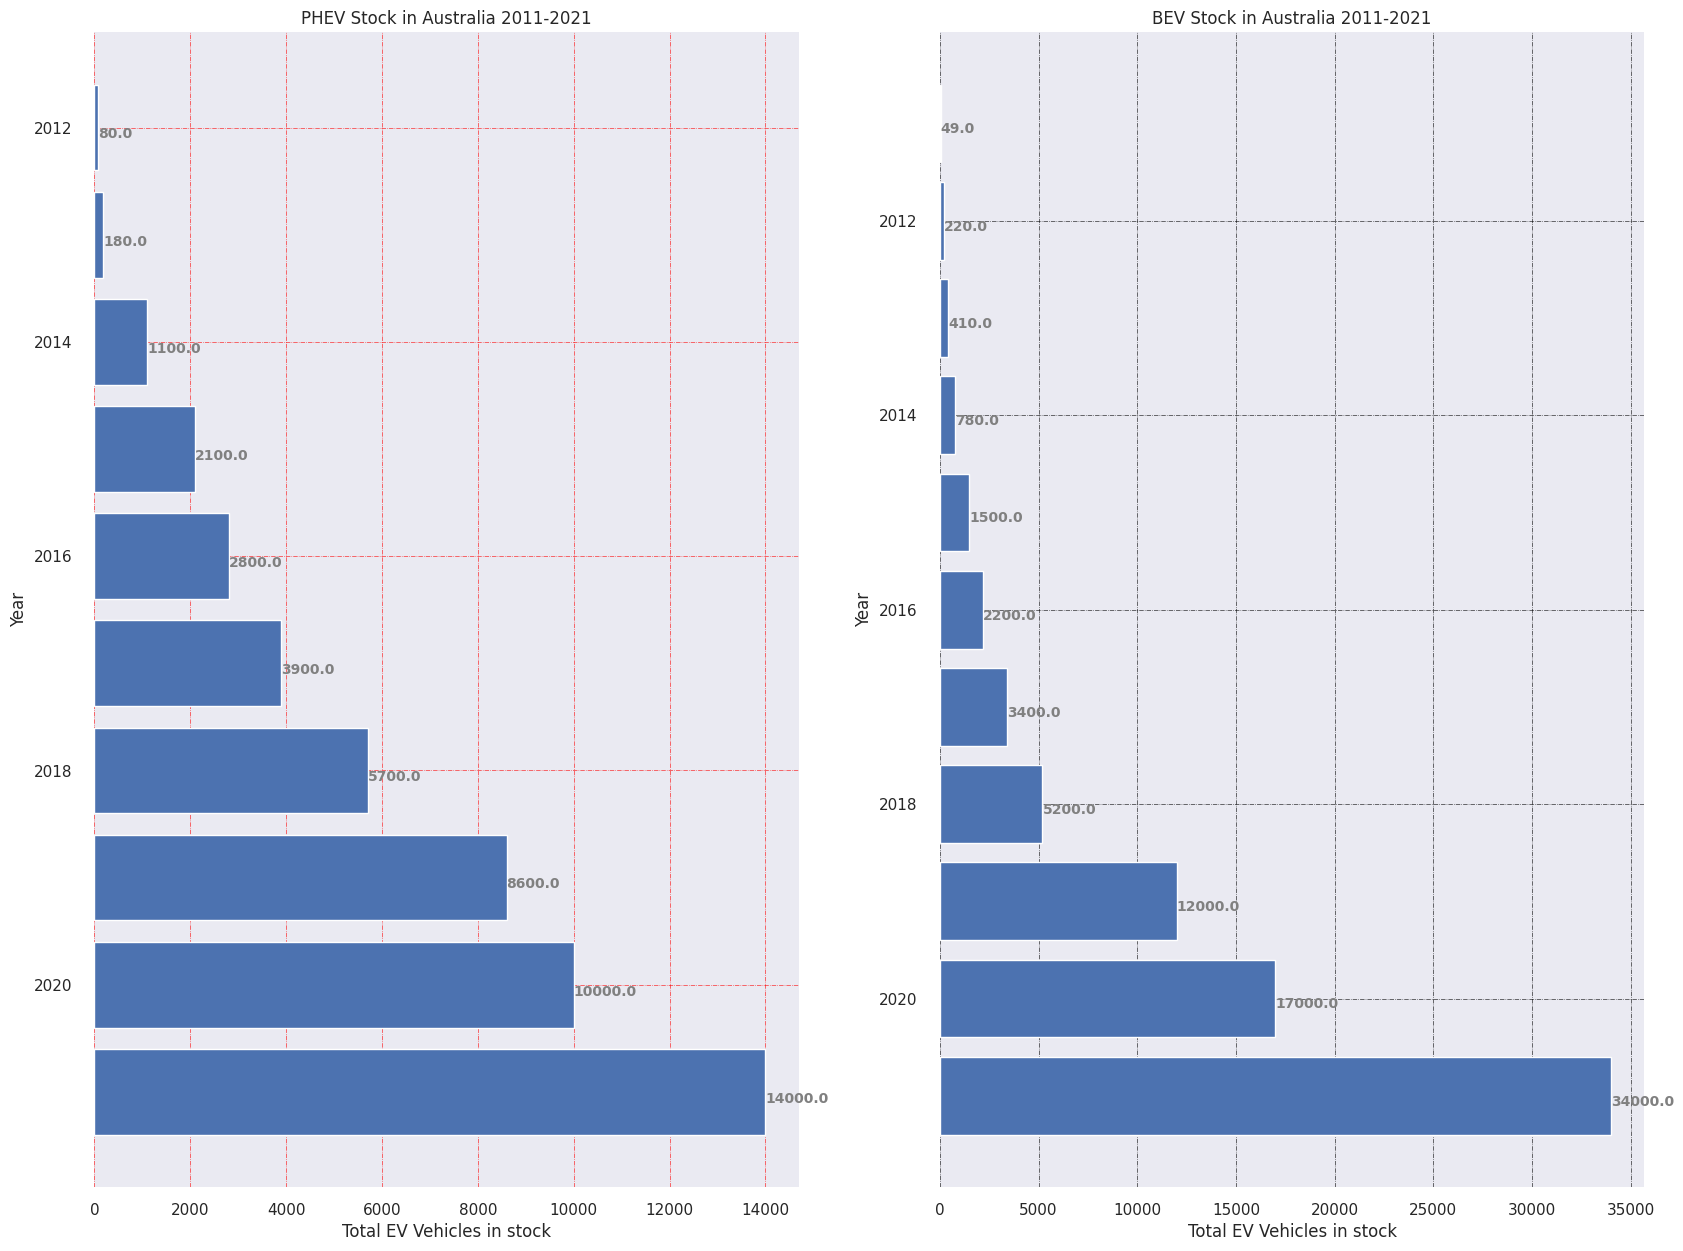

In [81]:
# CREATING A HORIZONTAL BAR PLOT

# Drop unrequired columns
aus_stock_PHEV.drop(['year', 'PCT change %', 'Stock Growth'], axis='columns')
aus_stock_BEV.drop(['year', 'PCT change %', 'Stock Growth'], axis='columns')

# Set fig size along with axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(20, 15))

# Create Horizontal Bar Plots & Set Labels
ax1.barh(aus_stock_PHEV.year, aus_stock_PHEV.value, align='center')
ax1.set_title('PHEV Stock in Australia 2011-2021', loc ='center')

ax2.barh(aus_stock_BEV.year, aus_stock_BEV.value)
ax2.set_title('BEV Stock in Australia 2011-2021', loc ='center')

ax1.set_xlabel('Total EV Vehicles in stock')
ax1.set_ylabel('Year')
ax2.set_xlabel('Total EV Vehicles in stock')
ax2.set_ylabel('Year')

# Remove axes splines & x, y Ticks
for s in ['top', 'bottom', 'left', 'right']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
# y_pos = np.arange(len(aus_stock_PHEV['year']))
# ax1.set_yticks(y_pos, labels=year)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')


# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad = 5)
ax1.yaxis.set_tick_params(pad = 10)
ax2.xaxis.set_tick_params(pad = 5)
ax2.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax1.grid(color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.8)
ax2.grid(color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.8) 
# Show top values
ax1.invert_yaxis()
ax2.invert_yaxis()

# Add annotation to bars
for i in ax1.patches:
    ax1.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
for i in ax2.patches:
    ax2.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Show Plot
plt.show()

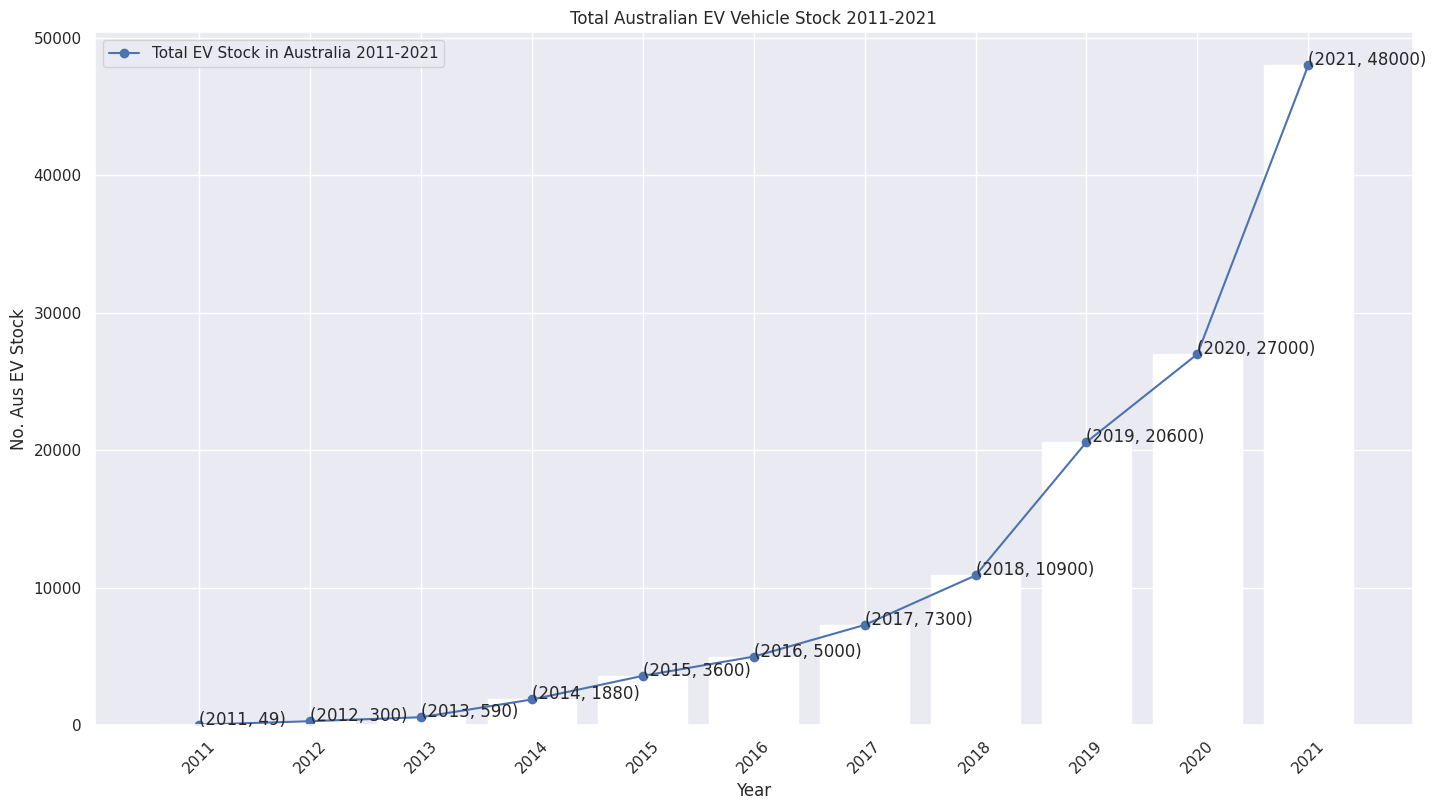

In [174]:
# Create a Plot
plt.figure(figsize=(17,9))
plt.plot(aus_stock_year.index, aus_stock_year.value, linestyle='-', marker='o', color='b',  label = 'Total EV Stock in Australia 2011-2021')

plt.xlabel("Year")
plt.ylabel("Total EV Vehicles")
plt.legend()
plt.title('Australia EV Vehicle Stock 2011-21')
plt.xticks(aus_stock_year.index, aus_stock_year.index, rotation=45)

# Show the data points for comparison of growth 
for xy in zip(aus_stock_year.index, aus_stock_year.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)

# Create Basic barplot and set labels
plt.bar(aus_stock_year.index, aus_stock_year.value, color = 'white', width=0.8, align='center')
plt.xlabel("Year")
plt.ylabel("No. Aus EV Stock")
plt.title("Total Australian EV Vehicle Stock 2011-2021")
plt.show()

Australian EV Vehicle stock has shown consistent growth over the 10 year period in both categories. It is worth noting BEV vehicles in particular exploded in popularity after the pandemic. 

## ML Models - Predict No. Australian EV Charging Stations 

### Simple Linear, Multi-Linear & Logistic Regression
Initially let's attempt to apply linear and logistic regression given the nature of the data set and these techniques being a great starting point. 

In [90]:
# import relevant libraries from sklearn. 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Simple Linear Regression Models
Let's attempt to set up a simple linear regression model using stock of EV Vehicles in Australia to predict No. of EV Charging Stations.

In [185]:
# Vehicle stock is independent variable
aus_stock_year2 = aus_stock_year.iloc[6:,0]
X = aus_stock_year2.values
X = X.reshape(-1,1)
X
# Dependent variable is no. of charging stations. 
y = ev_aus_total.iloc[:,1].values
y = y.reshape(-1,1)
y

# Let's print out the Head of the Target Variable. 
print('AUS. EV Charging Stations (DV): ' + '\n' +
      str(ev_aus_total.head()))

# Let's print out the Head of the Independent Variable. 
print('\nAUS. EV Vehicle Stock (IV): ' + '\n' +
      str(aus_stock_year2.head()))

# Calculate the Correlation Coefficient between two variables 
coeff = np.corrcoef(X, y, rowvar=False)
print('\nCoefficient of Determination: ' + str(coeff[0,1]))

# Creating simple linear regression model to make predictions
reg = LinearRegression().fit(X, y)
pred = reg.predict([[70000]])
print('\nPrediction No. AUS EV Charging stations for 70,000 EV Stock: ' + str(pred))

# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)
# clf.fit(X_train, y_train) 
print('\nModel Accuracy Score: ' + str(reg.score(X_test, y_test)))

AUS. EV Charging Stations (DV): 
     powertrain   value
year                   
2017   FastSlow   480.0
2018   FastSlow   731.0
2019   FastSlow  1950.0
2020   FastSlow  2350.0
2021   FastSlow  2350.0

AUS. EV Vehicle Stock (IV): 
year
2017     7300.0
2018    10900.0
2019    20600.0
2020    27000.0
2021    48000.0
Name: value, dtype: float64

Coefficient of Determination: 0.8422452268740329

Prediction No. AUS EV Charging stations for 70,000 EV Stock: [[3798.16386048]]

Model Accuracy Score: 0.8099549455902918


In [158]:
# sns.barplot(data=ev_aus_total, x="year", y="value", errorbar="sd")
# ax = sns.barplot(data=ev_aus_total, x='powertrain', y='value', hue='card_name')
# ev_aus_total2 = ev_aus.drop('powertrain', axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(aus_stock_year.iloc[6:,0].corr(ev_aus_total.iloc[:,1].values), fmt='.4g', annot=True)

##create pairplots using seaborn
%matplotlib inline
# sns.pairplot(ev_aus, hue='powertrain', height = 5) # correlation between different variables. 

TypeError: unsupported type: <class 'numpy.ndarray'>

<Figure size 1000x700 with 0 Axes>

## EDA on World Data

In [85]:
# Fast charging stations in 2021
f = ev.loc[(ev['powertrain'] == 'Publicly available fast') & (ev['year'] == 2021)]
f2 = f.drop_duplicates(subset=['region'])
l = f2.nlargest(5, 'value')

# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Vertical Bar Plot
plt.bar(l['region'], l['value'])
 
# Show Plot
plt.title('World Fast Charging Stations 2021', fontsize=14)
plt.xlabel('World Region', fontsize=14)
plt.ylabel('No. of Stations', fontsize=14)
plt.grid(True)
plt.show()


NameError: name 'ev' is not defined

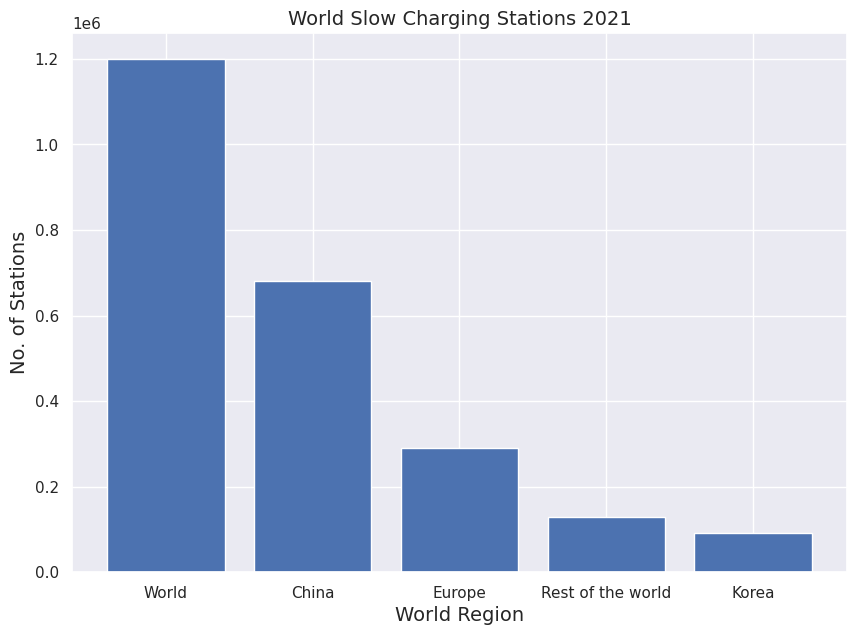

In [ ]:
# Slow charging stations in 2021
f = ev.loc[(ev['powertrain'] == 'Publicly available slow') & (ev['year'] == 2021)]
f2 = f.drop_duplicates(subset=['region'])
l = f2.nlargest(5, 'value')

# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Vertical Bar Plot
plt.bar(l['region'], l['value'])
 
# Show Plot
plt.title('World Slow Charging Stations 2021', fontsize=14)
plt.xlabel('World Region', fontsize=14)
plt.ylabel('No. of Stations', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Select all the EV Charging stations for the entire world
ev_world1 = ev_world[ev_world['region'] == 'World'].drop_duplicates()

# Check the unique values
ev_world1.select_dtypes(include='object').nunique()

region        1
parameter     8
powertrain    5
dtype: int64

1 region being the world and 2 different powertrains being fast and slow charging stations. This makes sense. 

In [ ]:
ev_world1

,region,parameter,powertrain,year,value
6671,World,EV stock share,EV,2010,0.0019
6672,World,EV stock share,EV,2010,0.0007
6673,World,EV sales share,EV,2010,0.0270
6674,World,EV stock share,EV,2010,0.0044
6675,World,EV sales share,EV,2010,0.0120
...,...,...,...,...,...
7429,World,Oil displacement Mbd,EV,2030,2.4000
7430,World,Oil displacement Mlge,EV,2030,30000.0000
7431,World,Oil displacement Mlge,EV,2030,14000.0000
7432,World,Oil displacement Mlge,EV,2030,16000.0000


In [ ]:
# Let's drop the high estimates in order to be conservative in predicting charging stations for 2025 and 2030
ev_world1.drop([7262,7263], axis=0)
ev_world1.drop([7399,7400], axis=0)
# ev_world1.drop(7399, axis=0)

,region,parameter,powertrain,year,value
6671,World,EV stock share,EV,2010,0.0019
6672,World,EV stock share,EV,2010,0.0007
6673,World,EV sales share,EV,2010,0.0270
6674,World,EV stock share,EV,2010,0.0044
6675,World,EV sales share,EV,2010,0.0120
...,...,...,...,...,...
7429,World,Oil displacement Mbd,EV,2030,2.4000
7430,World,Oil displacement Mlge,EV,2030,30000.0000
7431,World,Oil displacement Mlge,EV,2030,14000.0000
7432,World,Oil displacement Mlge,EV,2030,16000.0000


([<matplotlib.axis.XTick at 0x7ffa8f8bfc40>,
 [Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2025, 0, '2025'),
  Text(2025, 0, '2025'),
  Text(2030, 0, '2030'),
  Text(2030, 0, '2030')])

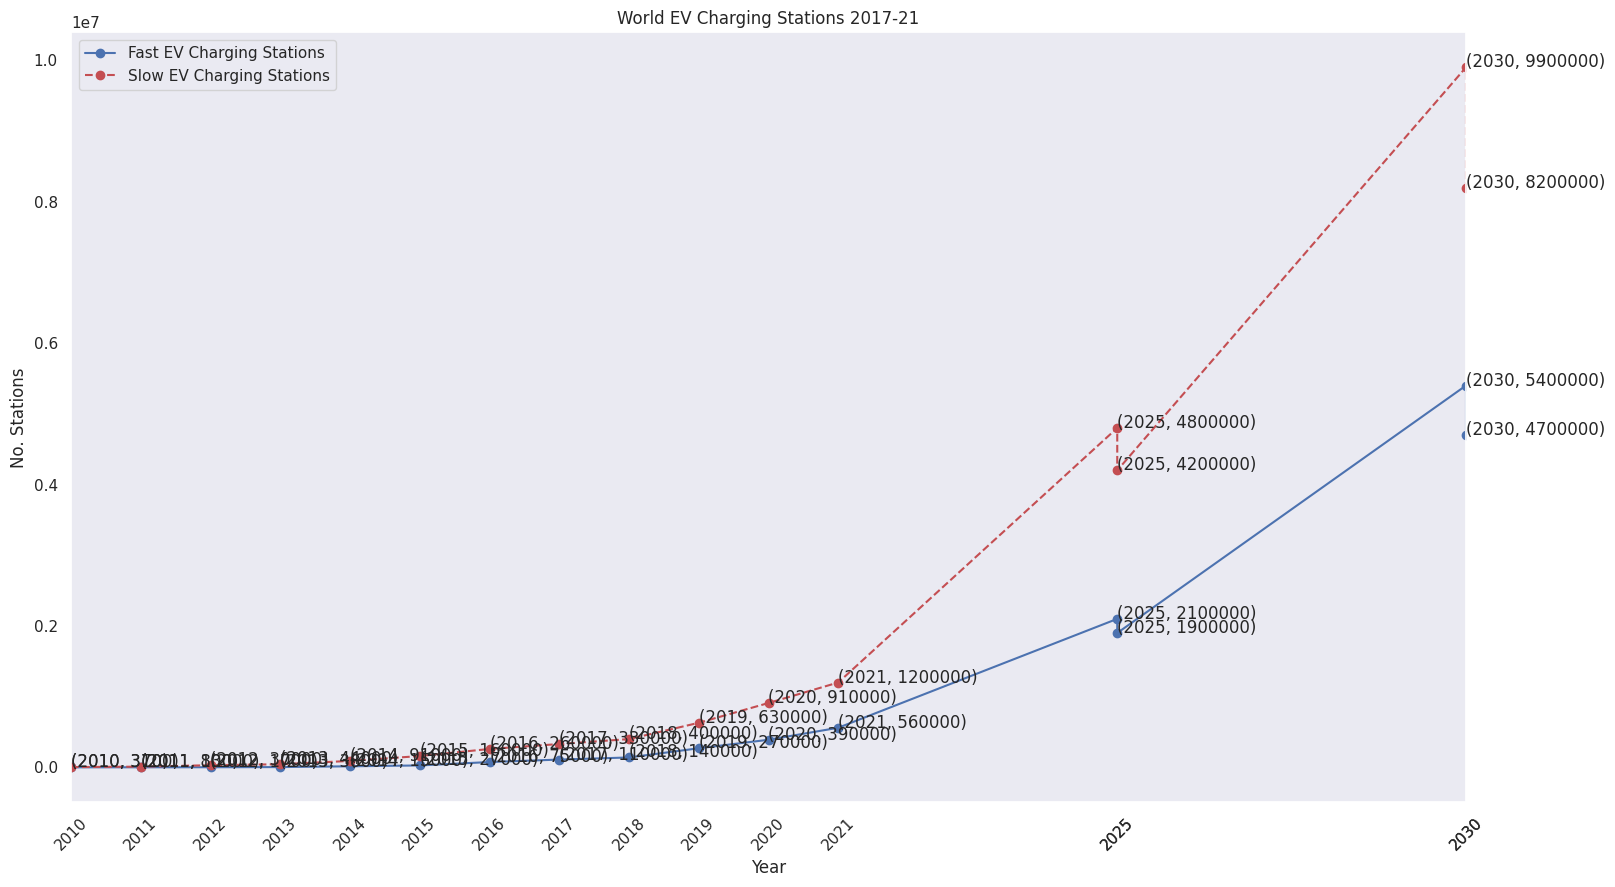

In [ ]:
# Create scatterplot showing change in World Charging Stations over time.  
fig, ax = plt.subplots(figsize=(18, 10))
ev_world_fast = ev_world1[ev_world1['powertrain'] == 'Publicly available fast']
ev_world_slow = ev_world1[ev_world1['powertrain'] == 'Publicly available slow']

# Plot the lines for fast and slow charging station growth
plt.plot(ev_world_fast.year, ev_world_fast.value, linestyle='-', marker='o', color='b',  label = 'Fast EV Charging Stations')
plt.plot(ev_world_slow.year, ev_world_slow.value, linestyle='--', marker='o', color='r',  label = 'Slow EV Charging Stations')

# Prepare the Axis
plt.xlabel("Year")
plt.ylabel("No. Stations")
ax.set_xlim(2010, 2021)
plt.legend()
plt.grid()

# Show the data points for comparison of growth 
for xy in zip(ev_world_slow.year, ev_world_slow.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)

for xy in zip(ev_world_fast.year, ev_world_fast.value):
   plt.annotate('(%.0f, %.0f)' % xy, xy=xy)

# Plot title and x-axis annotation
plt.title('World EV Charging Stations 2017-21')
plt.xticks(ev_world_fast.year, ev_world_fast.year, rotation=45)

In [ ]:
# sns.heatmap(ev_aus.corr(), annot=True, cmap = 'BuPu_r')
# sns.pairplot(ev_aus, hue='value')
# ev_aus.plot.scatter(x='year', y='value')
# # plt.show()

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (13).

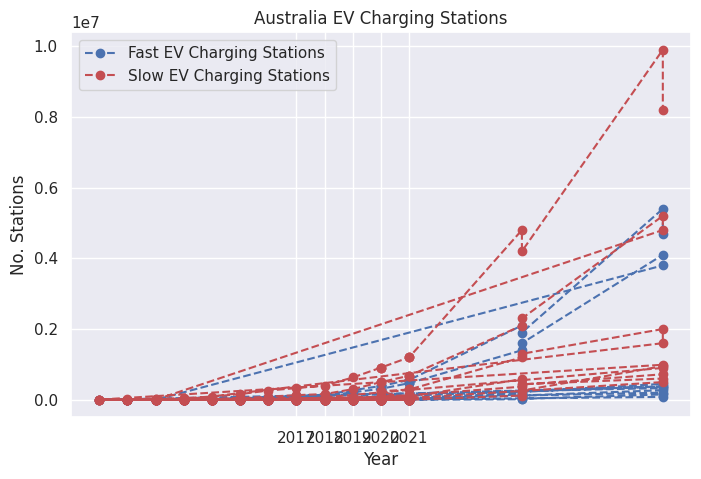

In [ ]:
plt.figure(figsize=(8,5))
ev_fast = ev[ev['powertrain'] == 'Publicly available fast']
ev_slow = ev[ev['powertrain'] == 'Publicly available slow']
# ev_aus_fast.head()
# ev_aus_fast.plot.scatter(x='year', y='value')
plt.plot(ev_fast.year, ev_fast.value, linestyle='--', marker='o', color='b',  label = 'Fast EV Charging Stations')
plt.plot(ev_slow.year, ev_slow.value, linestyle='--', marker='o', color='r',  label = 'Slow EV Charging Stations')

x = ['2010', '2011', '2012', '2013', '2014', '2016', '2017', '2018', '2019', '2020', '2021', '2025', '2030']

plt.xlabel("Year")
plt.ylabel("No. Stations")
plt.legend()
plt.title('Australia EV Charging Stations')
plt.xticks(ev_aus_fast.year, x, rotation=45)

In [ ]:
# Displaying Value Counts Per Attribute
with pd.option_context('display.max_rows', None,):
    print('5 largest regions:')
    print(ev['region'].value_counts().nlargest(6))
    print()

with pd.option_context('display.max_rows', None,):
    print('Value Counts by Category:')
    print(ev['category'].value_counts())
    print()    


# ev[(ev['category'] == 'Projection-APS')] / ev['category']

# ev_future = ev[(ev['unit'] == 'charging points') & (ev['category'] == 'Projection-APS')]
# percent_increase = ev_future / ev['category'].sum()
# print(percent_increase)

5 largest regions:
region
World          40
USA            35
China          32
India          27
Norway         23
Netherlands    22
Name: count, dtype: int64

Value Counts by Category:
category
Historical          527
Projection-STEPS     48
Projection-APS       48
Name: count, dtype: int64



The above 5 regions have the most data on EV Charging stations since they have the highest value counts. It is indicated they are the most active in the EV Charging stations market as such. 

Value Counts by category indicates that most countries have limited projections on the number of EV Charging Stations individually in the future. Most of the projects are from a general continental perspective. This is evidence by far more data points being associated with historical rather than future categories. This is a key area warranting further research. 

In [ ]:
ev_proj = ev[(ev['category'] == 'Projection-APS')]
ev_proj['region'].value_counts()


# ev_future = ev[(ev['unit'] == 'charging points') & (ev['category'] == 'Projection-APS')]
# percent_increase = ev_future / ev['category'].sum()
# print(percent_increase)

region
China                8
Europe               8
India                8
Rest of the world    8
USA                  8
World                8
Name: count, dtype: int64

In [ ]:
# ev_future.plot.scatter('region', 'value')
ev_future['value'].head(100)

973      310000.0
974      500000.0
1118     470000.0
1119     680000.0
1169    1600000.0
1170    2300000.0
1329    4100000.0
1330    5200000.0
1865      38000.0
1866     240000.0
1896      44000.0
1897     290000.0
1998     220000.0
1999    1300000.0
2160     450000.0
2161    2000000.0
3116         25.0
3117        540.0
3155         32.0
3156        910.0
3248      27000.0
3249     260000.0
3250     150000.0
3251     950000.0
5103      22000.0
5104      93000.0
5206      28000.0
5207     130000.0
5336     120000.0
5337     370000.0
5365     380000.0
5366     900000.0
6441      17000.0
6442      82000.0
6467      22000.0
6468      92000.0
6503     150000.0
6504     580000.0
6669     330000.0
6670     990000.0
7076     390000.0
7077     910000.0
7182     560000.0
7183    1200000.0
7262    2100000.0
7263    4800000.0
7364    5400000.0
7365    9900000.0
Name: value, dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,):
    print('Value Counts by Parameter:')
    print(ev['parameter'].value_counts())
    print()
with pd.option_context('display.max_rows', None,):
    print('Value Counts by mode:')
    print(ev['mode'].value_counts())
    print()


Value Counts by Parameter:
parameter
EV charging points    623
Name: count, dtype: int64

Value Counts by mode:
mode
EV    623
Name: count, dtype: int64



Value Counts by PowerTrain:
powertrain
Publicly available slow    313
Publicly available fast    310
Name: count, dtype: int64



<Axes: title={'center': 'PowerTrain'}, ylabel='count'>

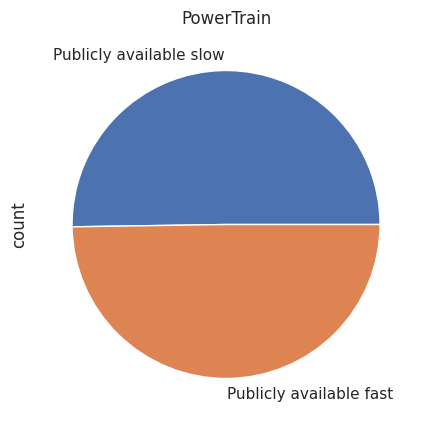

In [ ]:
with pd.option_context('display.max_rows', None,):
    print('Value Counts by PowerTrain:')
    print(ev['powertrain'].value_counts())
    print()
n = ev['powertrain'].value_counts()
n.plot.pie(y='Powertrain', figsize = (5, 5), title = 'PowerTrain')

Value Counts by Unit:
unit
charging points    623
Name: count, dtype: int64

Value Counts by Year:
year
2020    88
2021    86
2019    62
2018    61
2017    57
2016    48
2015    44
2014    42
2013    36
2012    31
2025    24
2030    24
2011    14
2010     6
Name: count, dtype: int64



<Axes: xlabel='year', ylabel='value'>

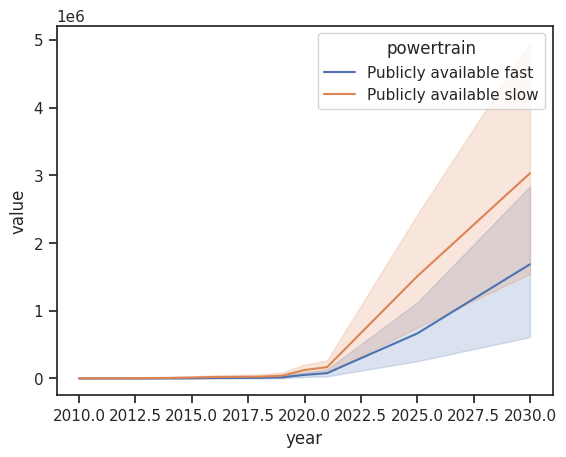

In [ ]:
with pd.option_context('display.max_rows', None,):
    print('Value Counts by Unit:')
    print(ev['unit'].value_counts())
    print()
ev2 = ev[(ev['parameter'] == 'EV charging points')]
# ev = ev[(ev[''])]
with pd.option_context('display.max_rows', None,):
    print('Value Counts by Year:')
    print(ev['year'].value_counts())
    print()

import seaborn as sns
ev.head()
sns.lineplot(data=ev2, x='year', y='value', hue='powertrain')


# n.plot.line(x = 'year', y = 'n')
# ev.head()
# ev.plot.line(x='year', y = 'value')


# import seaborn as sns
# sns.set_theme(style="ticks")

# # Define the palette as a list to specify exact values
# palette = sns.color_palette("rocket_r")

# # Plot the lines on two facets
# sns.relplot(
#     data=ev,
#     x="year", y="value",
#     hue="powertrain", size="choice", col="align",
#     kind="line", size_order=["T1", "T2"], palette=palette,
#     height=5, aspect=.75, facet_kws=dict(sharex=False),
# )

From looking at the above information from the value counts, we can accertain the target row attributes and useful information. The largest regions for EV sales are China, USA and Europe. In terms of the parameter EV Stock, sales and charging points are of interest. EV charging points should be focused on. Unit should focus on the charging points, sales and stock. Most recent historical data comes from the end of 2021 since this report was published in May 2022.  

### Group Data for Insights

In [ ]:
# Sorting & Grouping Data
# ev_sorted = ev.sort_values(by=(5), ascending=[False])
# DF_sorted

# Group Data by Region
ev_region = ev.groupby(['region', 'category', 'mode'])['category'].count()
print(ev_region)

# Group Data by Region
ev2 = ev.groupby(['region', 'parameter', 'mode'])['category'].count()
print(ev2)

# # Groupby multiple columns and aggregate()
# result = ev_groups.groupby(['Courses','Fee'])['Duration'].aggregate('count')
# print(result)

region             category          mode
Australia          Historical        EV      10
Belgium            Historical        EV      18
Brazil             Historical        EV       8
Canada             Historical        EV      20
Chile              Historical        EV      22
China              Historical        EV      16
                   Projection-APS    EV       8
                   Projection-STEPS  EV       8
Denmark            Historical        EV      20
Europe             Projection-APS    EV       8
                   Projection-STEPS  EV       8
Finland            Historical        EV      18
France             Historical        EV      20
Germany            Historical        EV      20
Greece             Historical        EV       7
Iceland            Historical        EV      15
India              Historical        EV      11
                   Projection-APS    EV       8
                   Projection-STEPS  EV       8
Indonesia          Historical        EV       

In [ ]:
# Select data by charging points in 2021
ev2 = ev[(ev['parameter'] == 'EV charging points') & (ev['year'] == 2021)]
print('Shape of new data frame: ' + str(ev2.shape))


print('\nRegions with most EV Charging points in 2021:')
ev2['region'].value_counts().nlargest(100)

ev2.groupby('value')

# ev2.head(100)
# ev2['year'].value_counts()

Shape of new data frame: (86, 8)

Regions with most EV Charging points in 2021:


In [ ]:
# Sorting & Grouping Data
ev_sorted = ev.sort_values(by=('region'), ascending=[False])
print(ev_sorted)

# Group Data by Region
ev_region = ev.groupby(['region', 'unit'])['region'].count()
print(ev_region)

# Group Data by Region
ev2 = ev.groupby(['region', 'parameter', 'mode'])['category'].count()
print(ev2)

# # Groupby multiple columns and aggregate()
# result = ev_groups.groupby(['Courses','Fee'])['Duration'].aggregate('count')
# print(result)

# ev_groups.mean()


         region          category              parameter   mode   
7433      World  Projection-STEPS  Oil displacement Mlge   Cars  \
6921      World        Historical               EV sales  Buses   
6930      World        Historical               EV stock  Buses   
6929      World        Historical               EV stock  Buses   
6928      World        Historical               EV sales   Cars   
...         ...               ...                    ...    ...   
51    Australia        Historical               EV sales   Cars   
52    Australia        Historical               EV sales   Cars   
53    Australia        Historical               EV stock   Cars   
54    Australia        Historical     EV charging points     EV   
0     Australia        Historical               EV sales   Cars   

                   powertrain  year                               unit   
7433                       EV  2030  Milion litres gasoline equivalent  \
6921                      BEV  2017            

### Australia EV Charging Station EDA
1. Select all of the Australia EV Charging Station Data and inspect it. 
EV charging points

,powertrain,year,value
38,Fast,2017,40.0
39,Slow,2017,440.0
44,Fast,2018,61.0
45,Slow,2018,670.0
54,Fast,2019,250.0
55,Slow,2019,1700.0
60,Fast,2020,350.0
61,Slow,2020,2000.0
70,Fast,2021,350.0
73,Slow,2021,2000.0


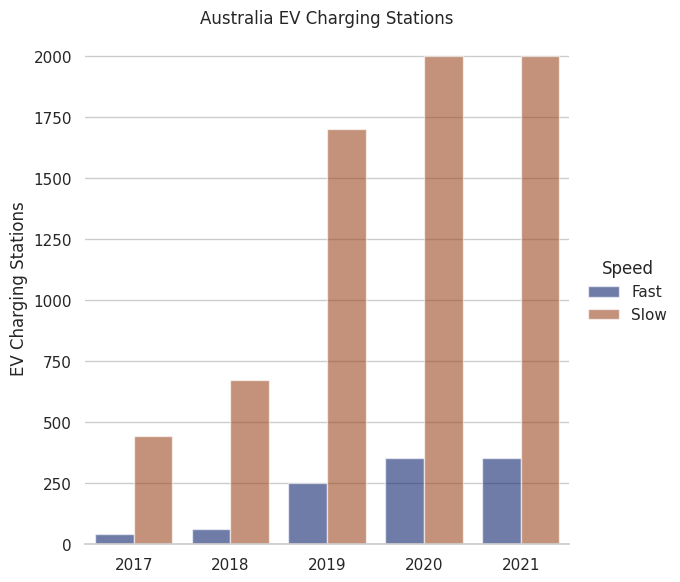

It is clear that there was a huge increase in the number of EV Charging Stations in Australia between 2018 and 2019 before the pandemic. 
Afterwards during lockdown there was not a great increase in the amount of charging stations within Australia. A possible reason is the pandemic. 

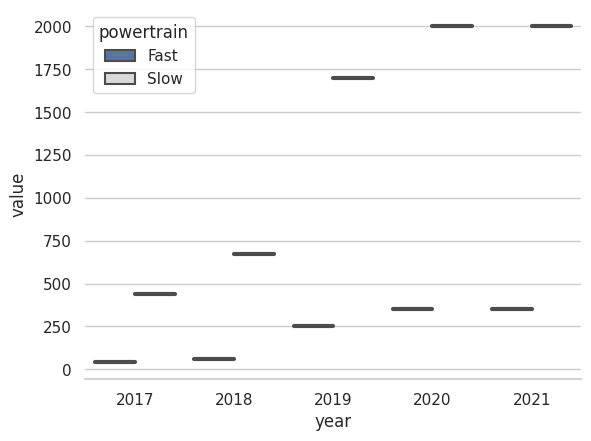

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=ev_aus, x="year", y="value", hue="powertrain",
               split=True, inner="stick", linewidth=3, orient = 'v',
               palette={"Fast": "b", "Slow": ".85"})
sns.despine(left=True)

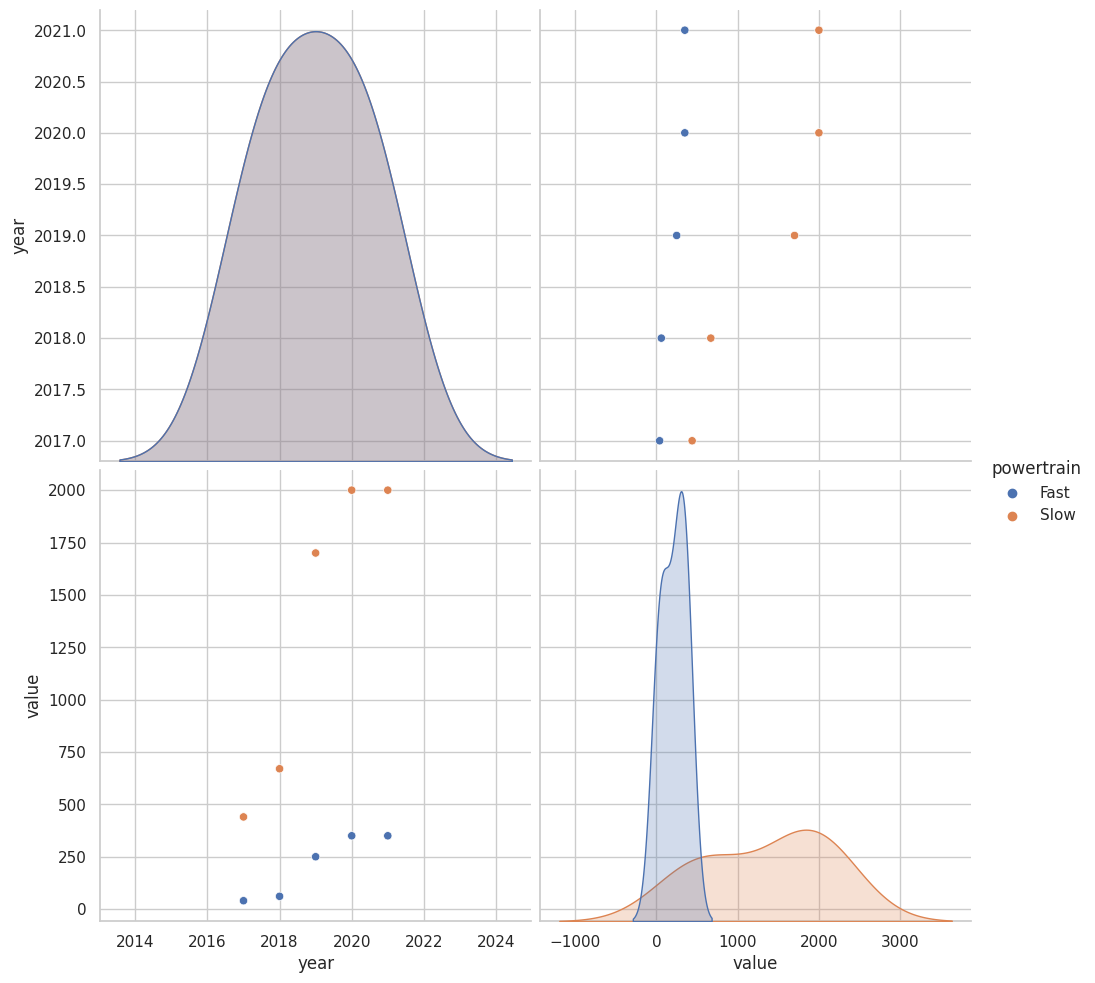

NameError: name 'ev' is not defined

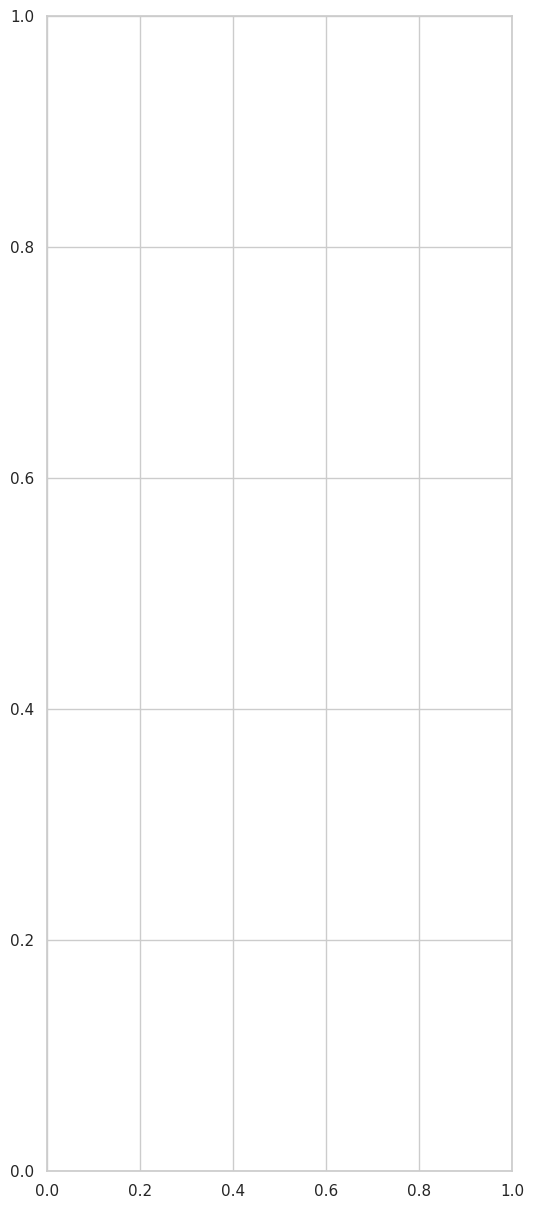

In [ ]:
# Horizontal barplot

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="year", y="abbrev", data=ev,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)